In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from openpyxl import load_workbook
import regex
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Excel file into a DataFrame with a multi-level column index
df = pd.read_excel('veh.xlsx', sheet_name='Sheet2')
r_veh = pd.read_excel('veh.xlsx', sheet_name='Sheet1')

In [3]:
r_veh

Registered year                                           Vehicles  \
0              2004                 Toyota Landcruiser 11 Seat Carrier   
1              2005                                   Toyota Hilux Ute   
2              2007         Subaru Outback Wgn Man 2.5l (air bag safe)   
3              2011           Toyota Hilux 4 x 4 Ute Auto Turbo Diesel   
4              2008                           Coromal PS421 Camper Van   
..              ...                                                ...   
62             2016                 Kia Cerato YD S 2.0L 6spd Auto Sdn   
63             2017                Toyota Rav 4 ZSA42R 2.0 GX CVT Auto   
64             2017                Toyota Rav 4 ZSA42R 2.0 GX CVT Auto   
65             2019  Toyota Hiace TRH201R 2.7long auto. rear cargo ...   
66             2019   Renault Kangoo 1.2EDC Auto petrol  Front car van   

   Registration_Number  
0              1BSX935  
1              1DHO356  
2              1COS860  
3              1DPQ704  
4              1TIZ941  
..                 ...  
62             1GEZ923  
63             1GJE113  
64             1GJE115  
65             1GSL829  
66             1GST515  

[67 rows x 3 columns]

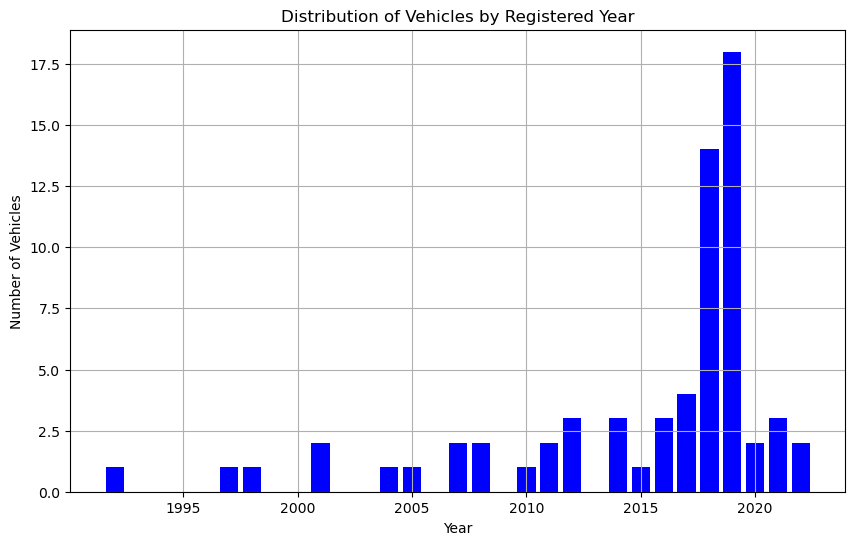

1992     1
1997     1
1998     1
2001     2
2004     1
2005     1
2007     2
2008     2
2010     1
2011     2
2012     3
2014     3
2015     1
2016     3
2017     4
2018    14
2019    18
2020     2
2021     3
2022     2
Name: Registered year, dtype: int64


In [4]:
# Convert 'Registered year' to integer
r_veh['Registered year'] = pd.to_numeric(r_veh['Registered year'], errors='coerce')

# Drop rows where 'Registered year' could not be converted to an integer
r_veh = r_veh.dropna(subset=['Registered year'])

# Convert 'Registered year' to integer type explicitly
r_veh['Registered year'] = r_veh['Registered year'].astype(int)

# Retry the analysis
vehicle_counts = r_veh['Registered year'].value_counts().sort_index()

# Plotting the distribution of vehicles by year
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(vehicle_counts.index, vehicle_counts.values, color='blue')
plt.title('Distribution of Vehicles by Registered Year')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

# Output the vehicle counts for further analysis
print(vehicle_counts)

The bar chart shows the number of vehicles registered each year. There's a noticeable increase in vehicle registrations in recent years, particularly in 2018 and 2019.

In [5]:
df

Vehicle Description  RegistrationNumber  \
0              Toyota Hilux Turbo Diesel (Manual)             1GCM620   
1                  Ford Ranger 2017 Double PU XLT             1GJE617   
2            Toyota Hilux 2005 VZN eng 5VZ1855423             1DHO356   
3    Toyota HiLux 4X4 2.8L Turbo Diesel Dual Cab              1GCD776   
4                       Toyota Landcruiser diesel             1BSX935   
..                                            ...                 ...   
135                       VW Combo Maxi Panel Van             1DNW981   
136                Ford Everest Trend 2.0 DTT RWD             1GZB575   
137        Toyota Hilux 4x4 2.8L DSL D/C/C 6AT ST             1HBB159   
138                              Ford Courier Ute             1BAC468   
139                         Jerry Cans - Vet Farm  Vet Farm Jerry Can   

     Jan-2022_$  Jan-2022_Ltr  Feb-2022_$  Feb-2022_Ltr  Mar-2022_$  \
0          0.00          0.00        0.00          0.00        0.00   
1        455.13        284.10      522.03        297.41      900.68   
2          0.00          0.00        0.00          0.00        0.00   
3          0.00          0.00        0.00          0.00      523.33   
4       1247.85        722.34      403.06        231.46      494.96   
..          ...           ...         ...           ...         ...   
135        0.00          0.00        0.00          0.00        0.00   
136      148.92         85.54       65.77         38.53      109.50   
137      580.04        352.91     1266.80        721.87      695.80   
138        0.00          0.00        0.00          0.00        0.00   
139      596.32        362.57      127.86         72.57      359.65   

     Mar-2022_Ltr  Apr-2022_$  Apr-2022_Ltr  ...  Aug-2022_$  Aug-2022_Ltr  \
0            0.00        0.00          0.00  ...        0.00          0.00   
1          438.85      445.15        229.10  ...     1405.36        729.12   
2            0.00        0.00          0.00  ...        0.00          0.00   
3          245.95       58.88         25.96  ...      155.64         73.69   
4          244.35      577.97        283.20  ...        0.00          0.00   
..            ...         ...           ...  ...         ...           ...   
135          0.00        0.00          0.00  ...        0.00          0.00   
136         48.03       90.19         44.94  ...      153.62         76.75   
137        344.29      562.29        284.82  ...      918.01        493.72   
138          0.00        0.00          0.00  ...        0.00          0.00   
139        197.25        0.00          0.00  ...        0.00          0.00   

     Sep-2022_$  Sep-2022_Ltr  Oct-2022_$  Oct-2022_Ltr  Nov-2022_$  \
0          0.00          0.00        0.00          0.00        0.00   
1       2381.88       1190.62      877.84        391.60     1092.28   
2        154.23        104.09      200.73        109.21      195.62   
3         83.08         38.09      514.65        229.31        0.00   
4          0.00          0.00     1781.67        701.91      806.85   
..          ...           ...         ...           ...         ...   
135        0.00          0.00        0.00          0.00        0.00   
136      179.17         87.13        0.00          0.00      148.81   
137     1471.86        747.11     1567.71        711.16      564.99   
138        0.00          0.00        0.00          0.00        0.00   
139        0.00          0.00        0.00          0.00        0.00   

     Nov-2022_Ltr  Dec-2022_$  Dec-2022_Ltr  
0            0.00        0.00          0.00  
1          509.44      714.11        340.96  
2          102.17      120.40         61.52  
3            0.00        0.00          0.00  
4          309.81        0.00          0.00  
..            ...         ...           ...  
135          0.00        0.00          0.00  
136         64.45      117.50         58.52  
137        244.03      476.98        239.10  
138          0.00        0.00          0.00  
139 

In [6]:
df.columns

Index(['Vehicle Description', 'RegistrationNumber', 'Jan-2022_$',
       'Jan-2022_Ltr', 'Feb-2022_$', 'Feb-2022_Ltr', 'Mar-2022_$',
       'Mar-2022_Ltr', 'Apr-2022_$', 'Apr-2022_Ltr', 'May-2022_$',
       'May-2022_Ltr', 'Jun-2022_$', 'Jun-2022_Ltr', 'Jul-2022_$',
       'Jul-2022_Ltr', 'Aug-2022_$', 'Aug-2022_Ltr', 'Sep-2022_$',
       'Sep-2022_Ltr', 'Oct-2022_$', 'Oct-2022_Ltr', 'Nov-2022_$',
       'Nov-2022_Ltr', 'Dec-2022_$', 'Dec-2022_Ltr'],
      dtype='object')

In [7]:
# Creating a summary of total liters and total cost for each vehicle
df['Total Liters'] = df.filter(like='_Ltr').sum(axis=1)
df['Total Cost'] = df.filter(like='_$').sum(axis=1)

# Displaying the summary along with the vehicle description
summary = df[['Vehicle Description', 'RegistrationNumber', 'Total Liters', 'Total Cost']]
summary.describe(include = 'all')

Vehicle Description RegistrationNumber  Total Liters    Total Cost
count                       137                106    140.000000    140.000000
unique                      119                 96           NaN           NaN
top     Cushman Utility Vehicle              C1417           NaN           NaN
freq                          3                  3           NaN           NaN
mean                        NaN                NaN    655.144000   1336.214214
std                         NaN                NaN   1248.001364   2550.852446
min                         NaN                NaN      0.000000      0.000000
25%                         NaN                NaN      0.000000      0.000000
50%                         NaN                NaN      0.000000      0.000000
75%                         NaN                NaN    854.505000   1711.545000
max                         NaN                NaN   6912.610000  14075.220000

In [8]:
summary.head()

Vehicle Description RegistrationNumber  \
0            Toyota Hilux Turbo Diesel (Manual)            1GCM620   
1                Ford Ranger 2017 Double PU XLT            1GJE617   
2          Toyota Hilux 2005 VZN eng 5VZ1855423            1DHO356   
3  Toyota HiLux 4X4 2.8L Turbo Diesel Dual Cab             1GCD776   
4                     Toyota Landcruiser diesel            1BSX935   

   Total Liters  Total Cost  
0          0.00        0.00  
1       6912.61    14075.22  
2        741.33     1420.29  
3       1631.48     3606.87  
4       3635.80     8013.80

This table shows the total fuel consumption in liters and the corresponding total cost for each vehicle listed. For instance, the Ford Ranger 2017 Double PU XLT consumed 6912.61 liters of fuel, costing a total of $14,075.22 throughout the year.

In [9]:
# Extracting monthly data for cost and liters
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_costs = df[[f'{month}-2022_$' for month in months]]
monthly_liters = df[[f'{month}-2022_Ltr' for month in months]]


In [11]:
# Remove rows with any missing values
df_cleaned = df.dropna()

In [12]:
df_cleaned["RegistrationNumber"].value_counts()

1GAT667               2
C1417                 2
1GDY743               2
1BFT332               2
1AXW429               2
                     ..
1GGG295               1
1GTI631               1
1GVB723               1
1GUH905               1
Vet Farm Jerry Can    1
Name: RegistrationNumber, Length: 94, dtype: int64

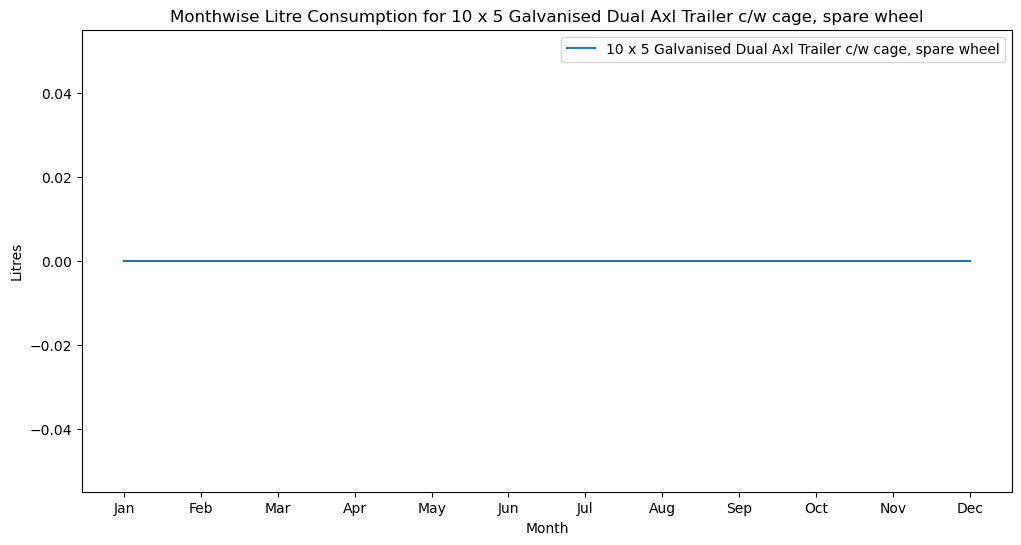

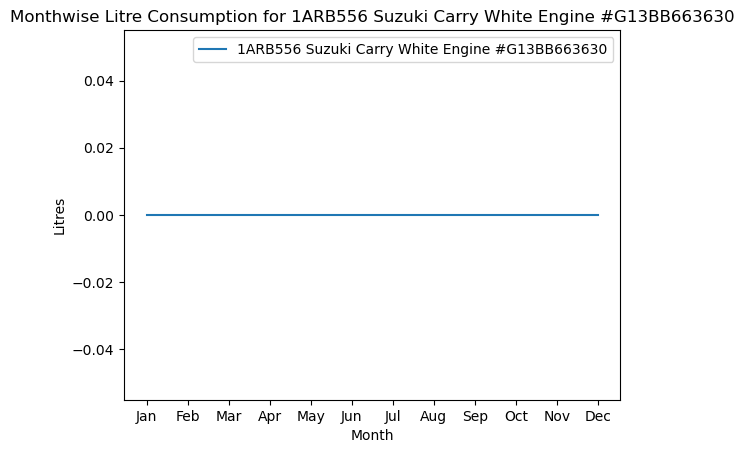

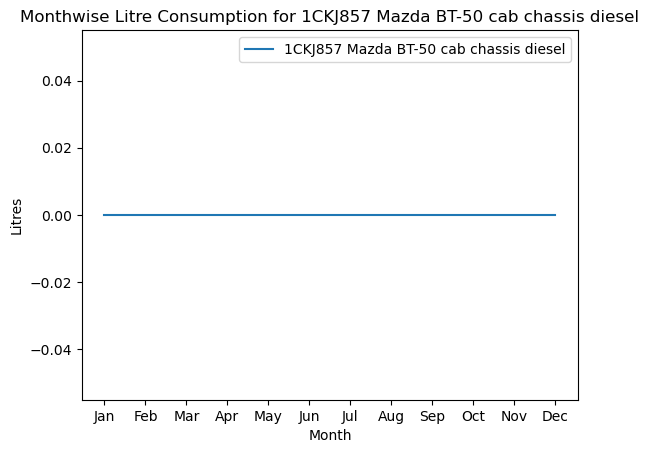

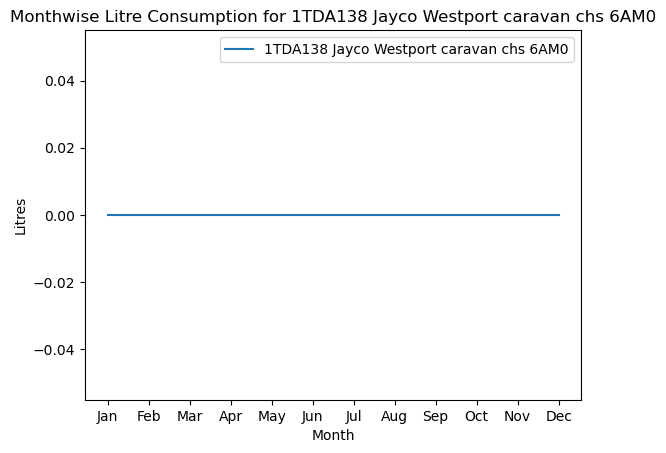

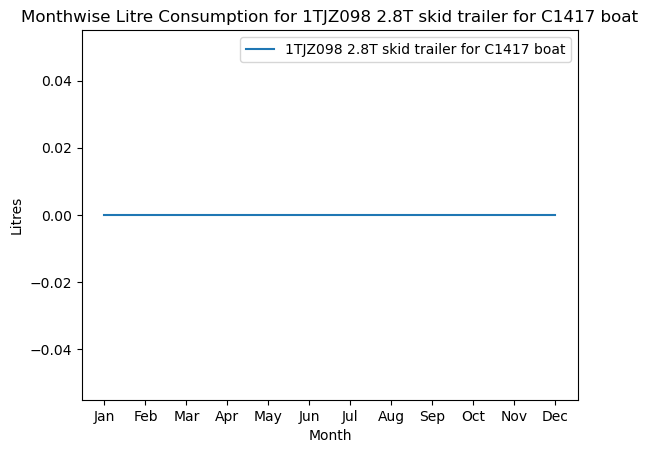

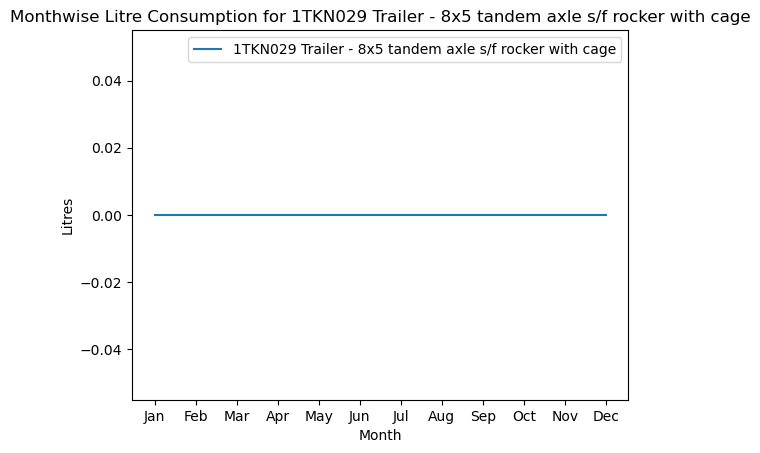

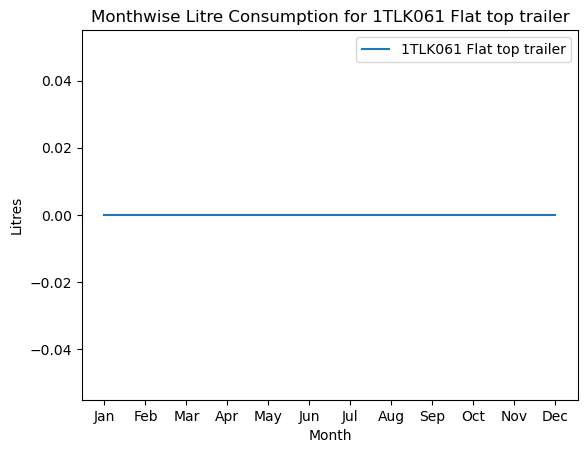

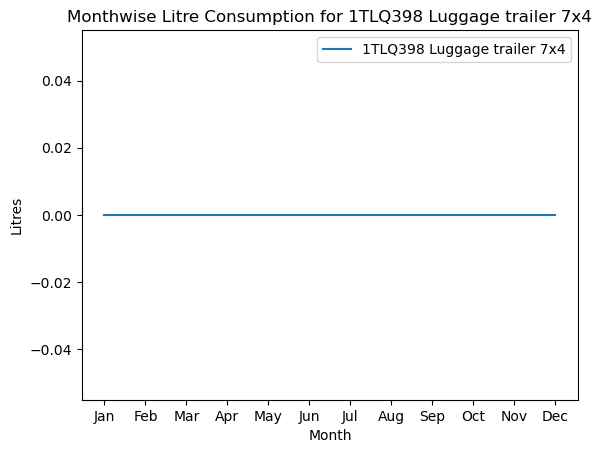

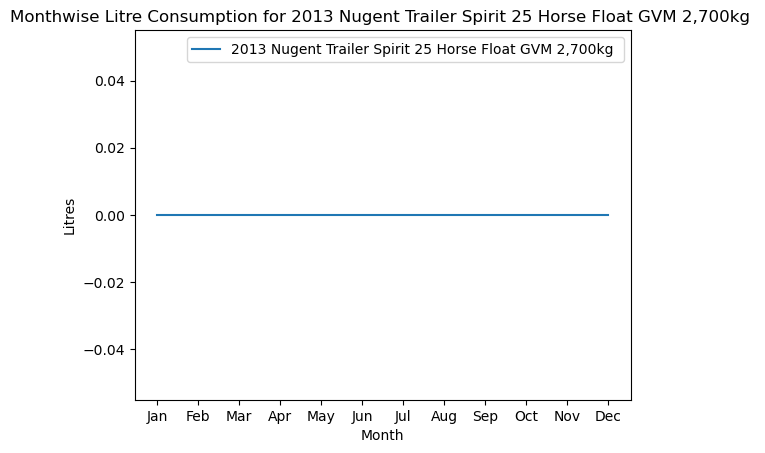

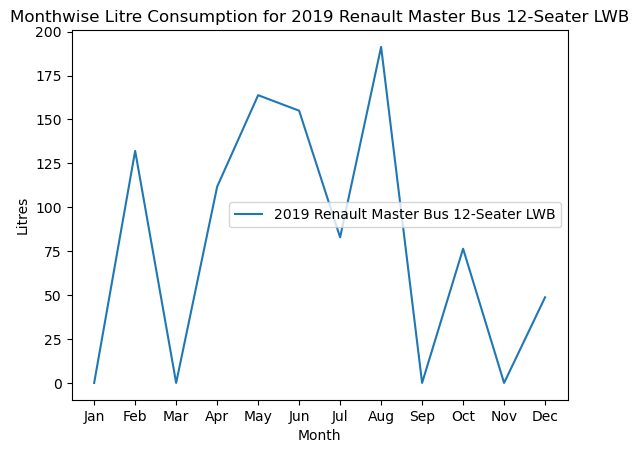

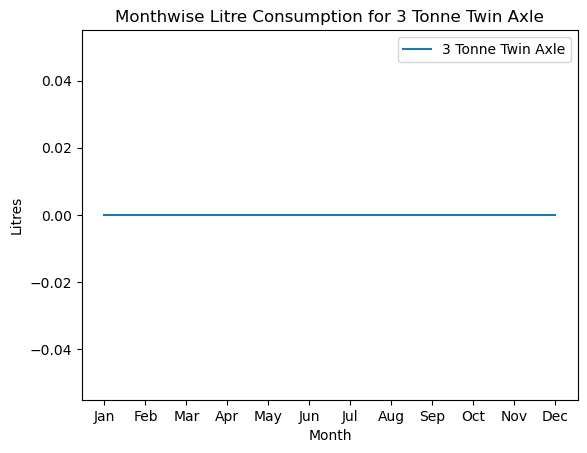

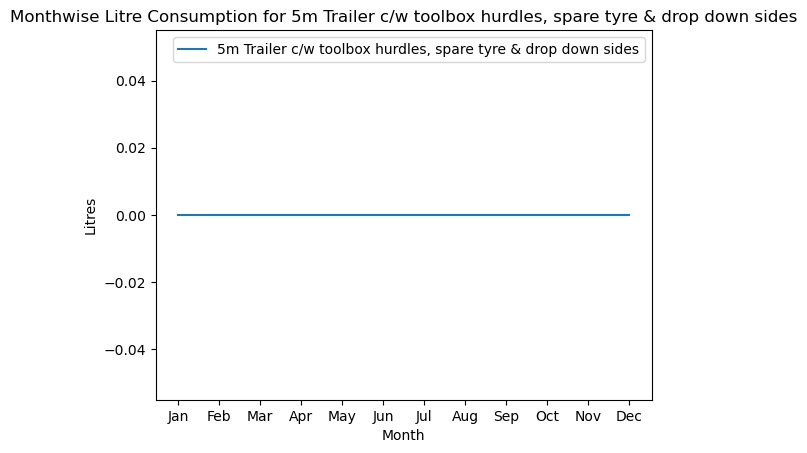

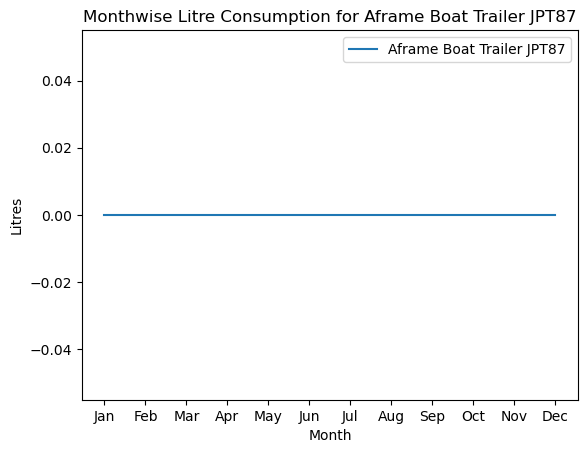

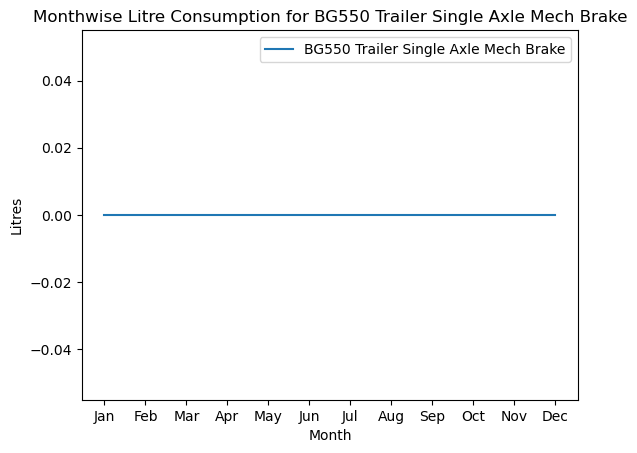

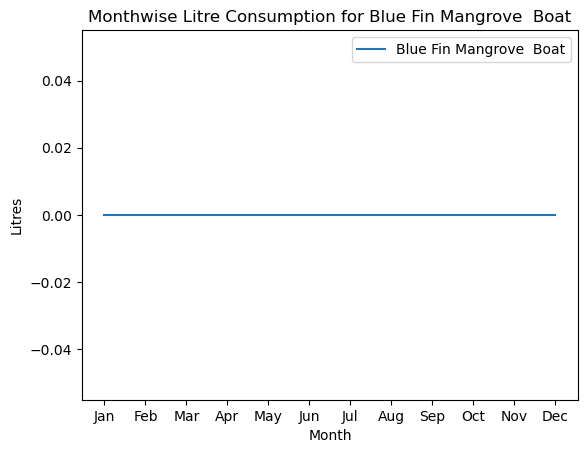

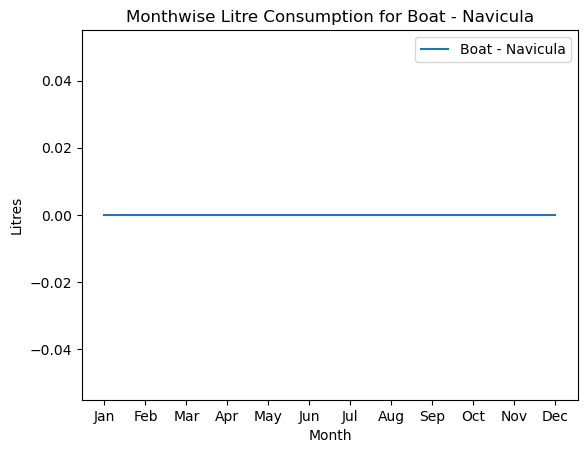

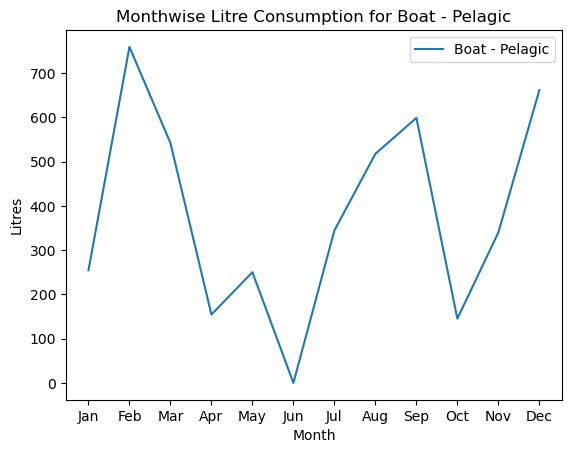

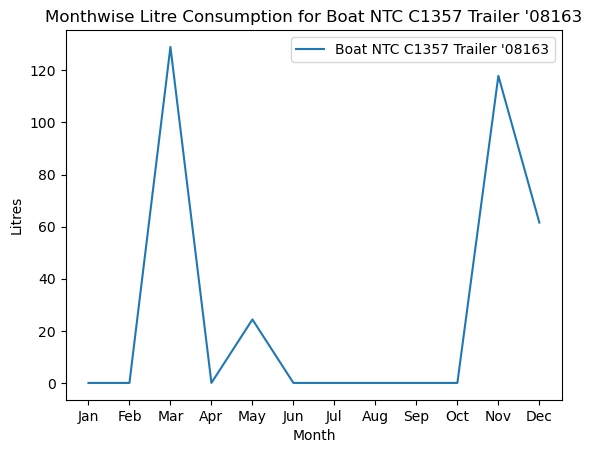

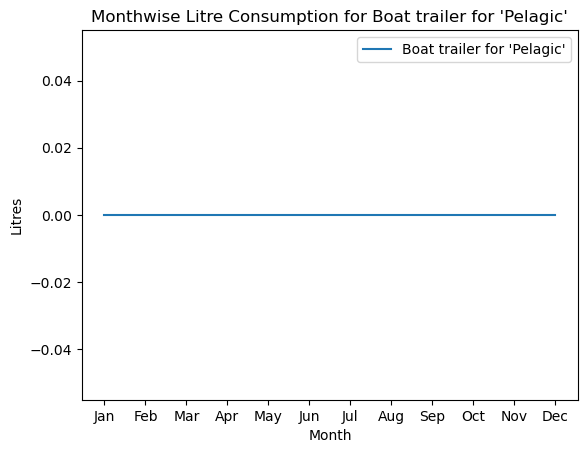

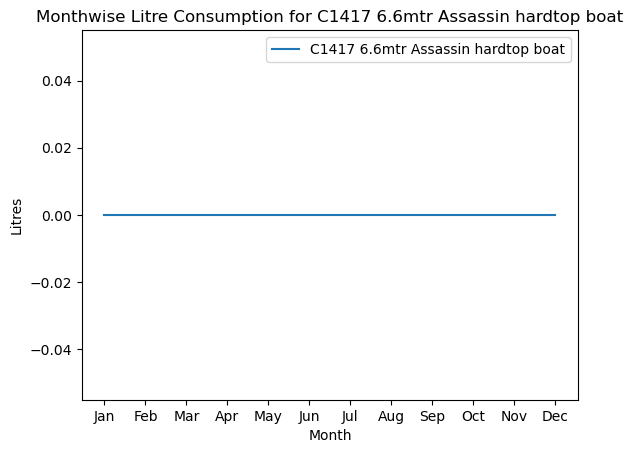

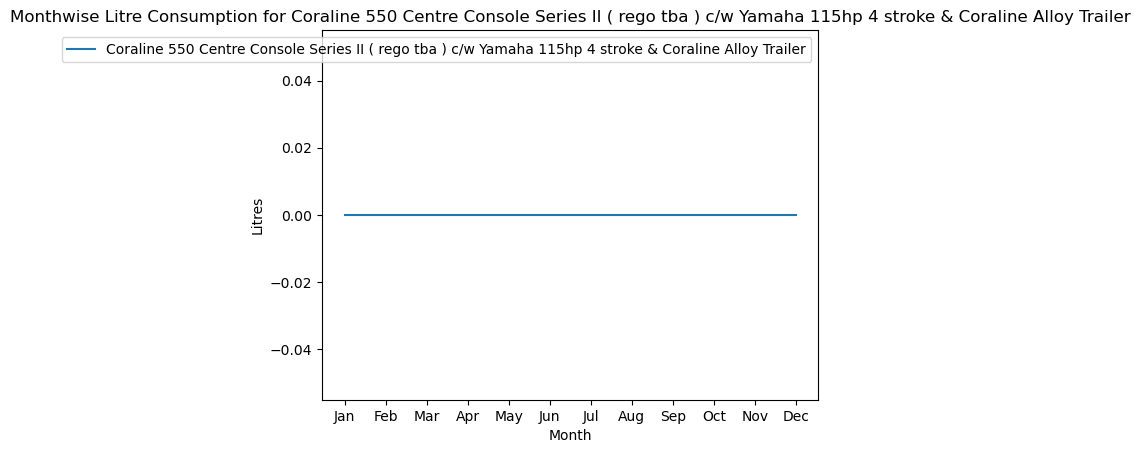

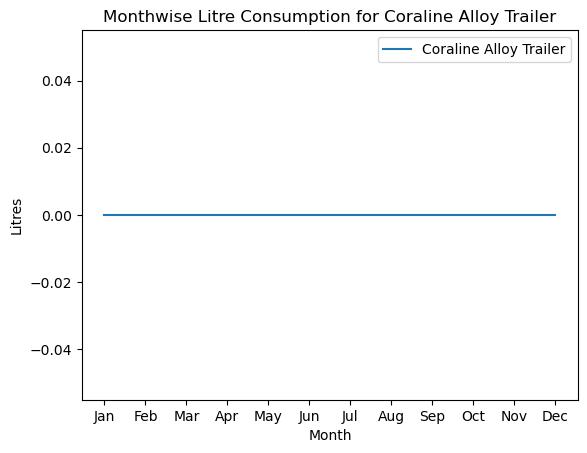

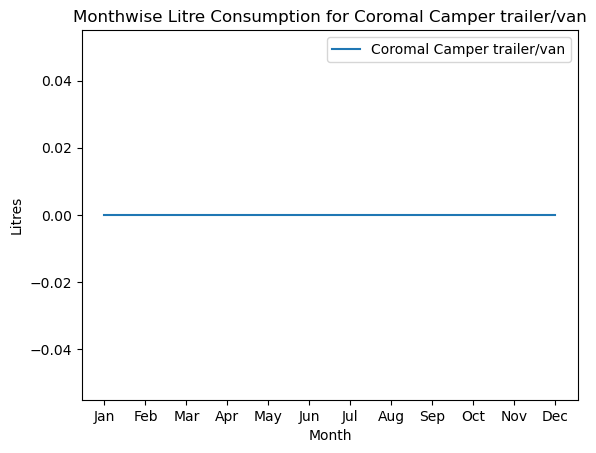

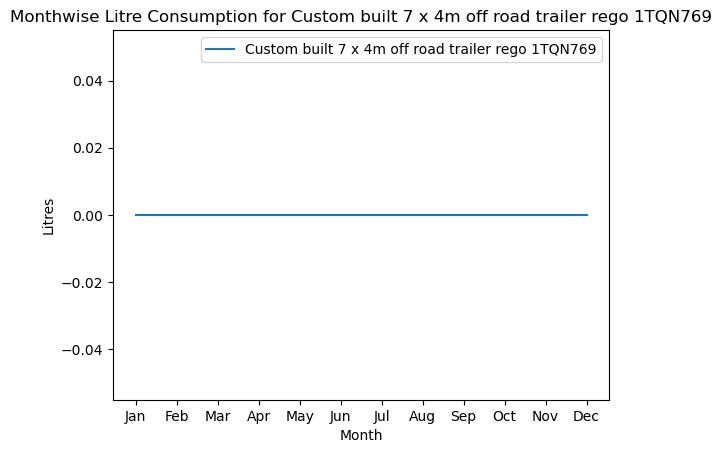

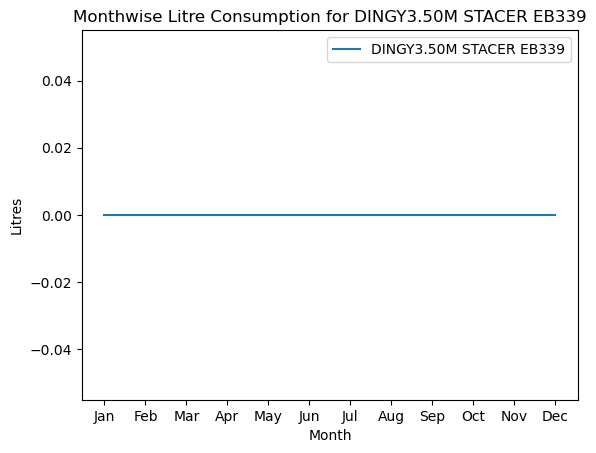

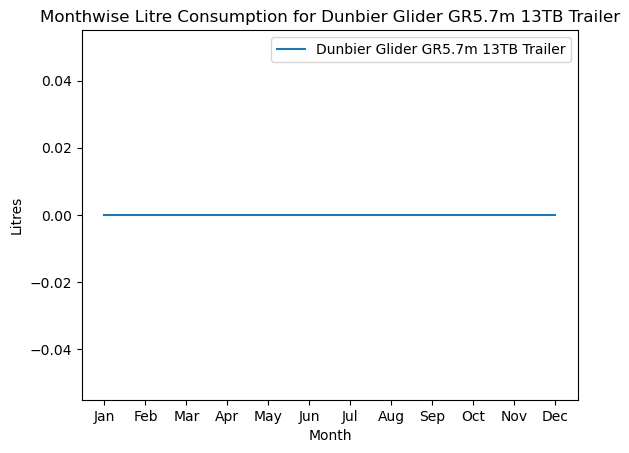

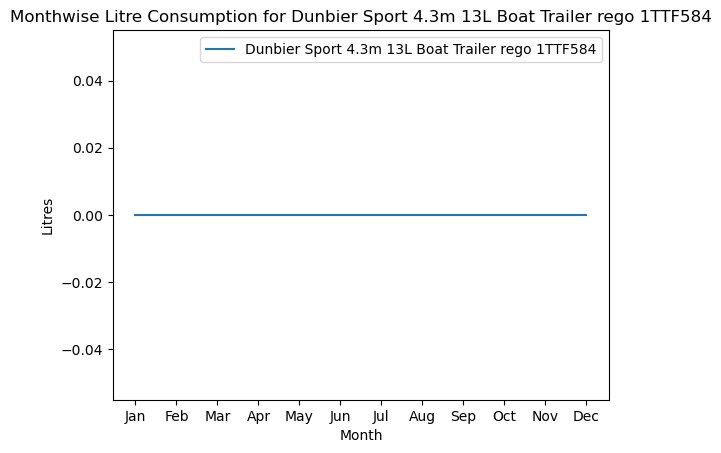

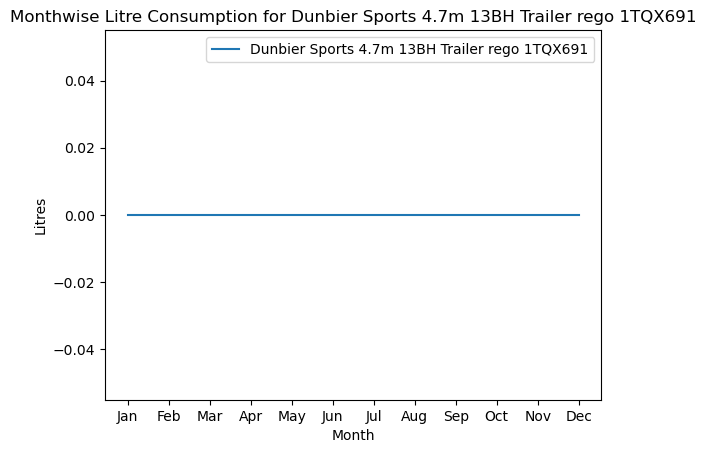

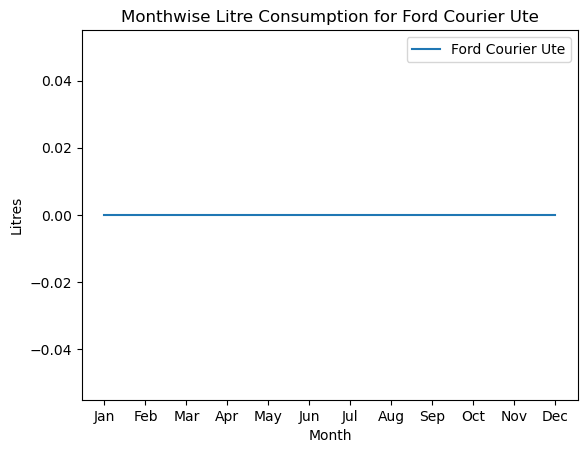

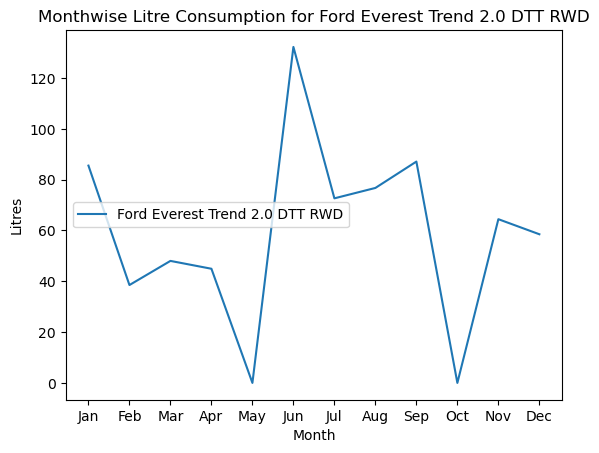

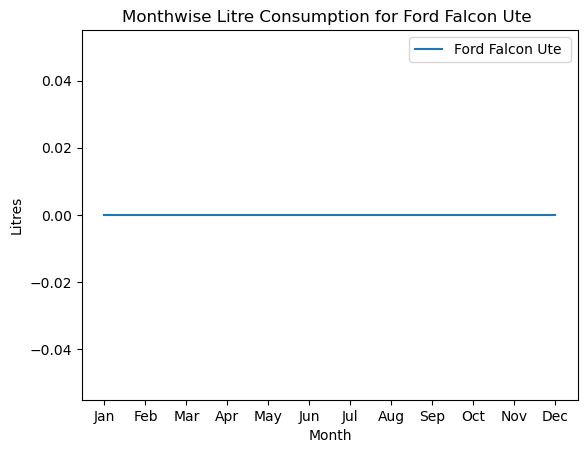

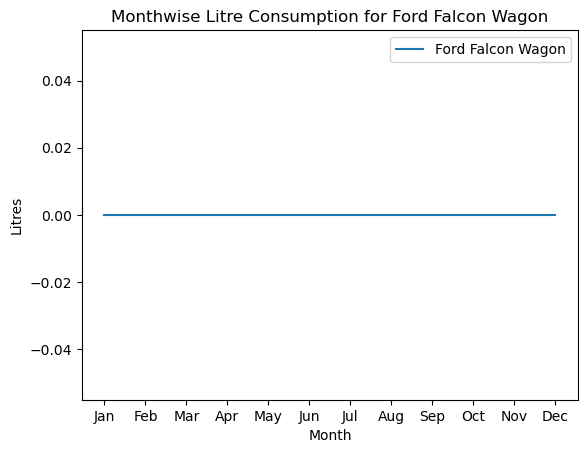

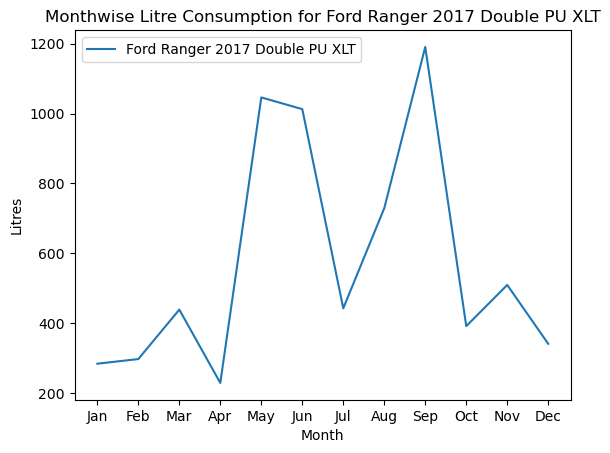

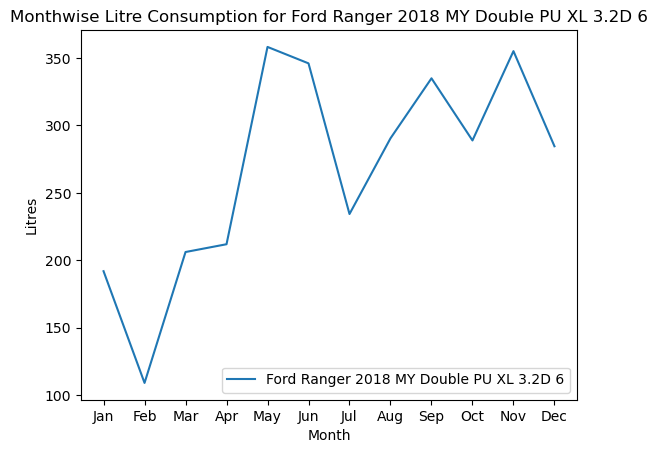

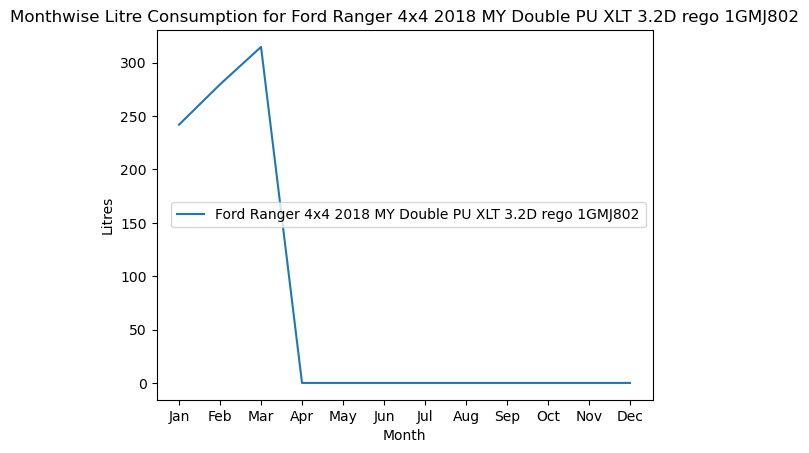

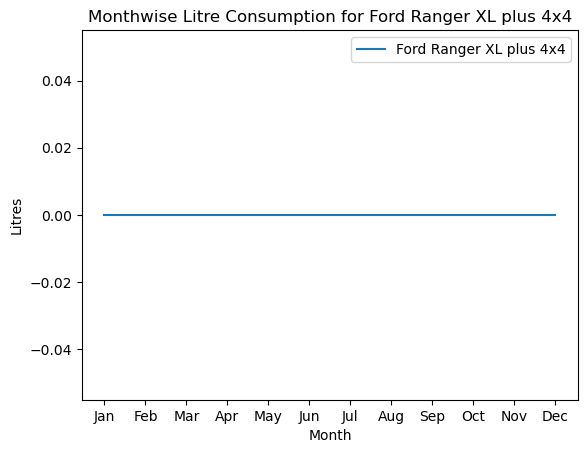

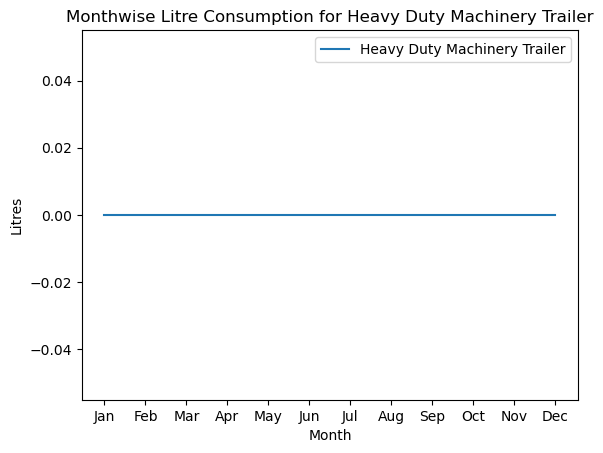

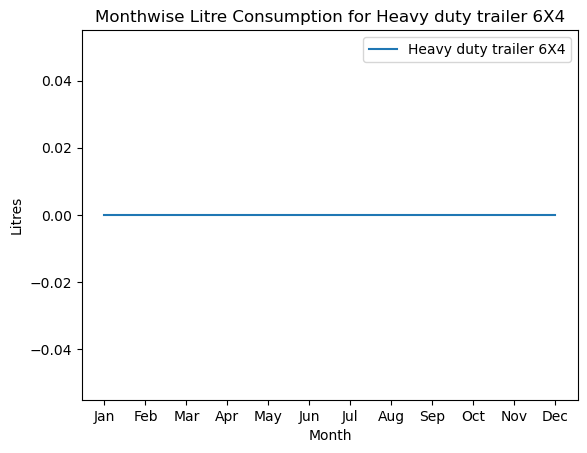

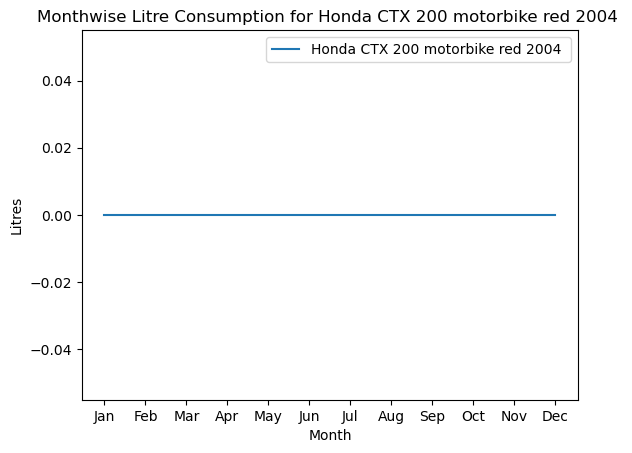

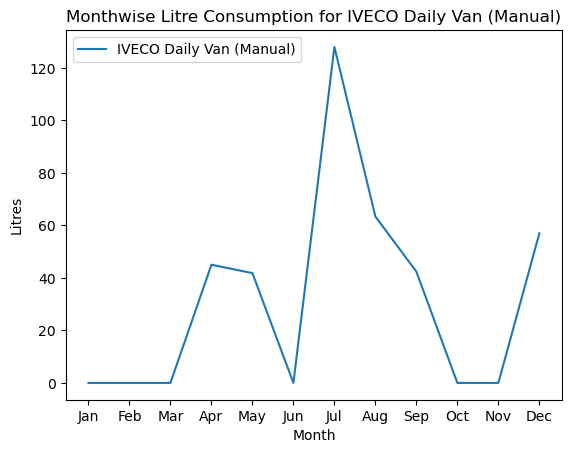

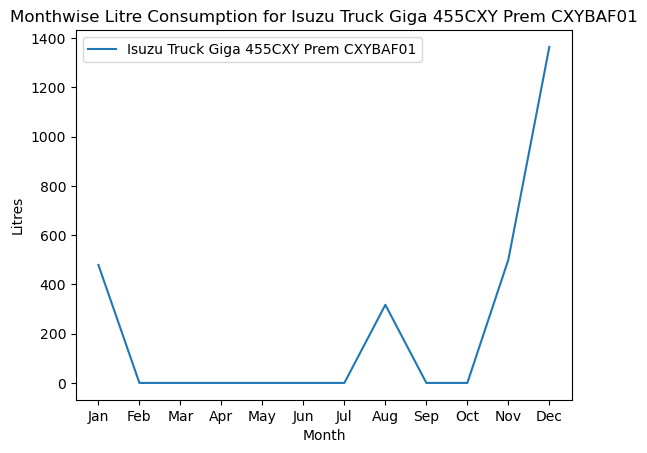

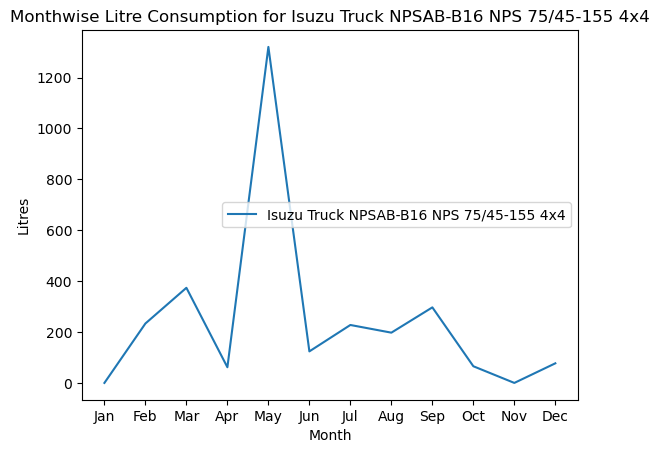

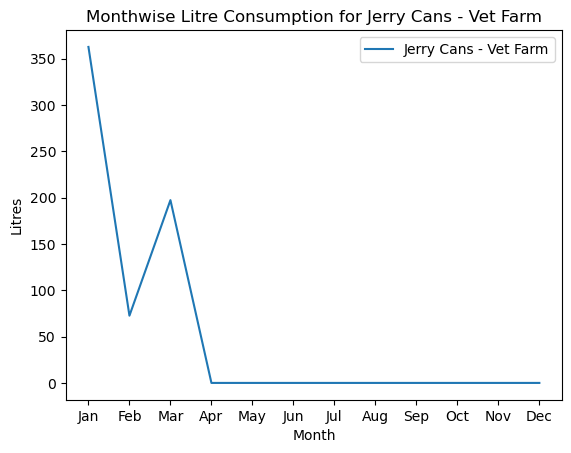

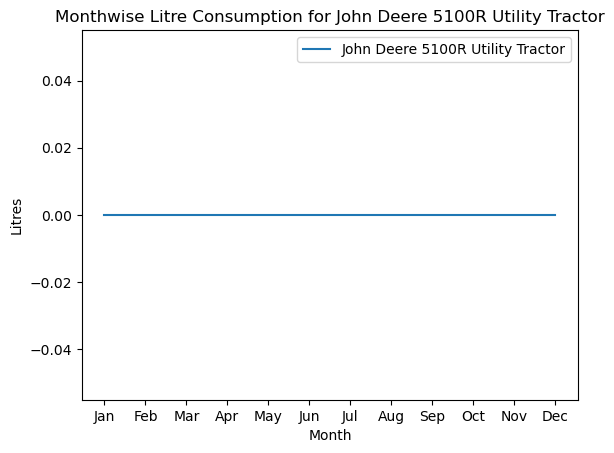

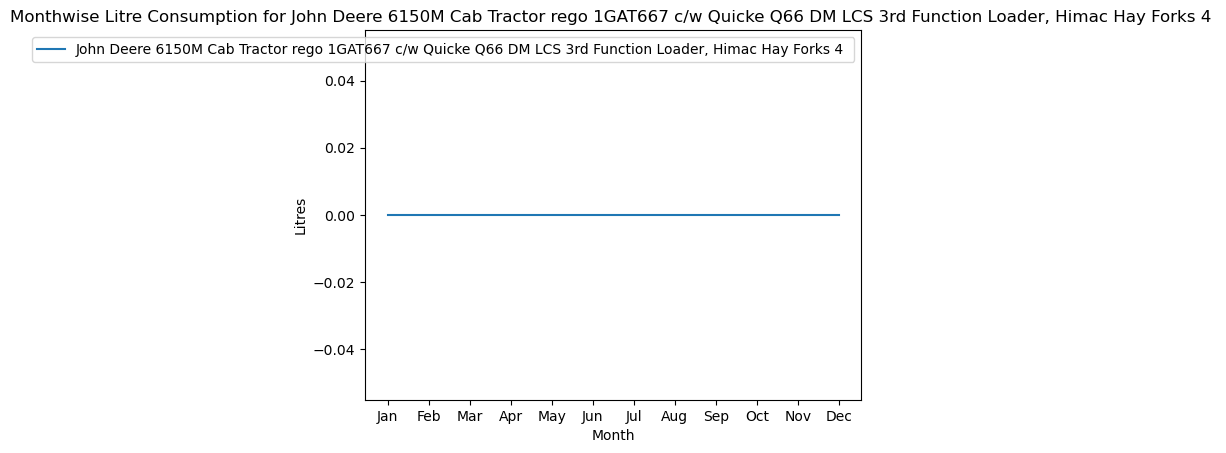

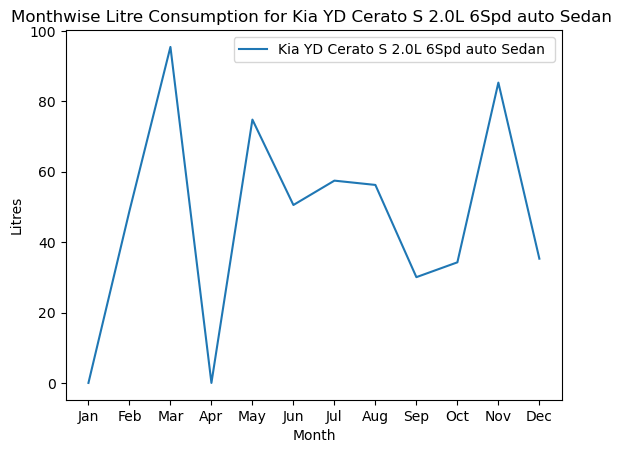

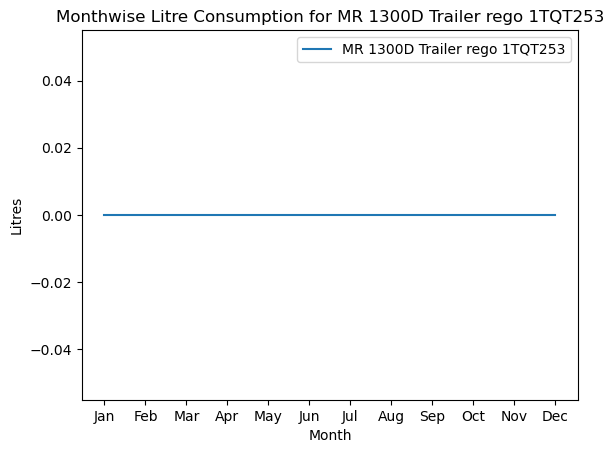

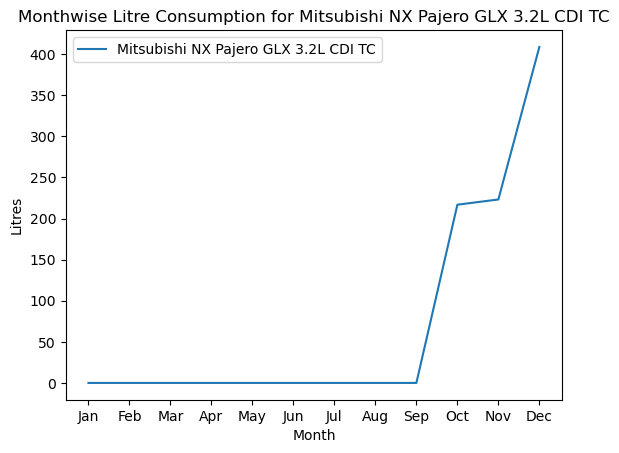

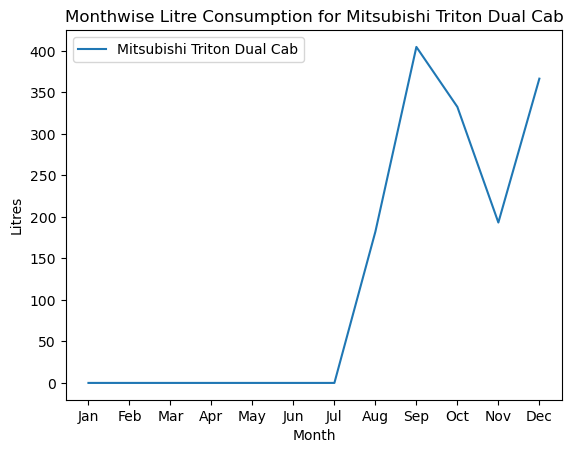

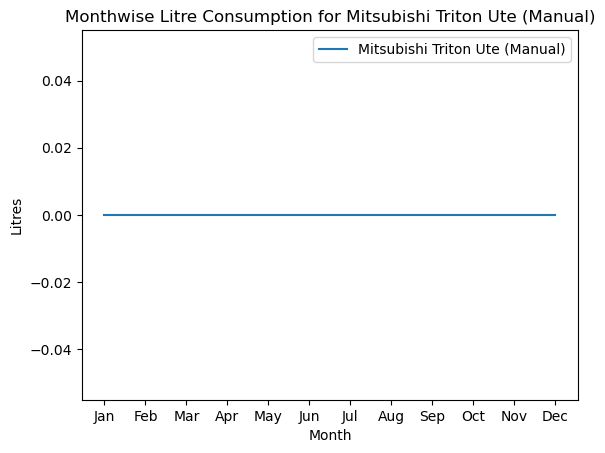

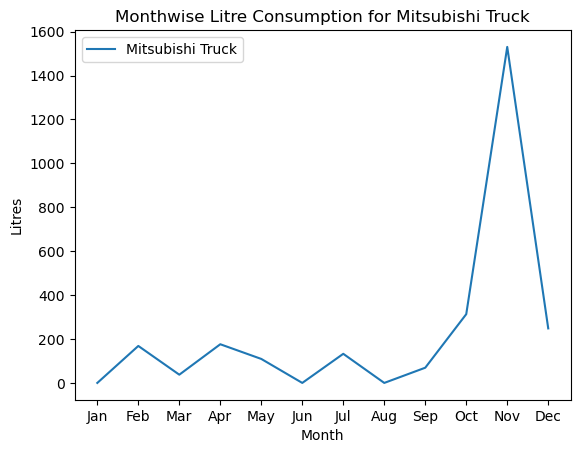

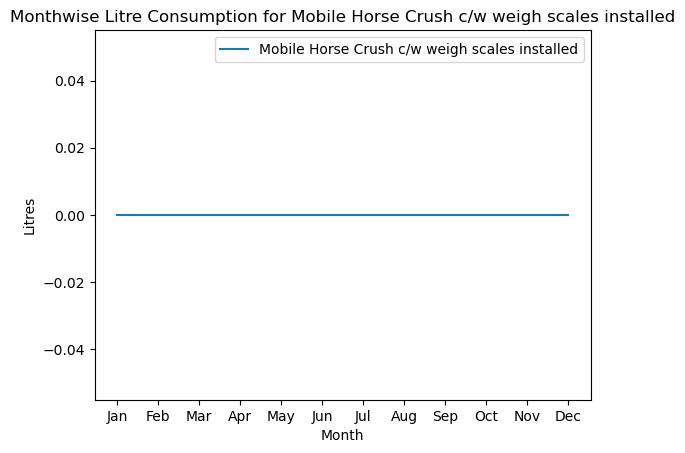

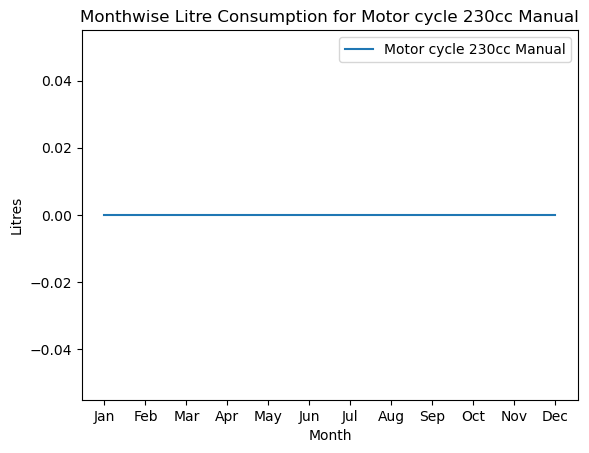

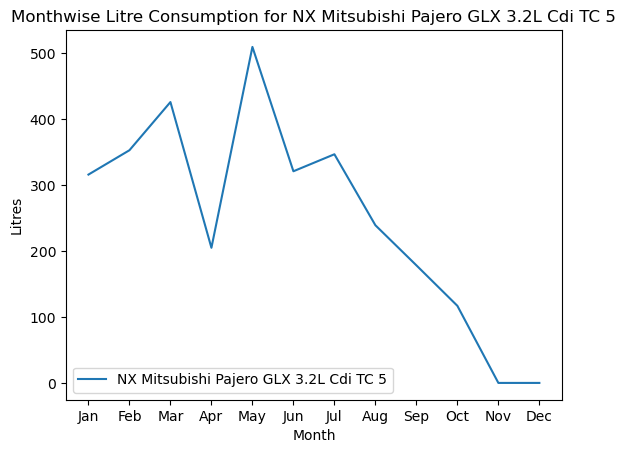

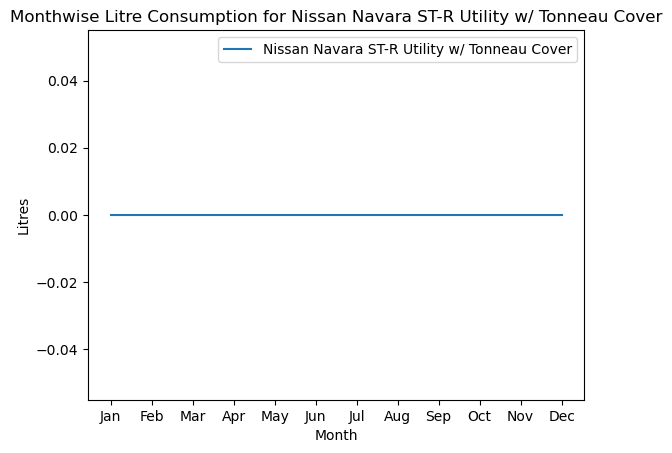

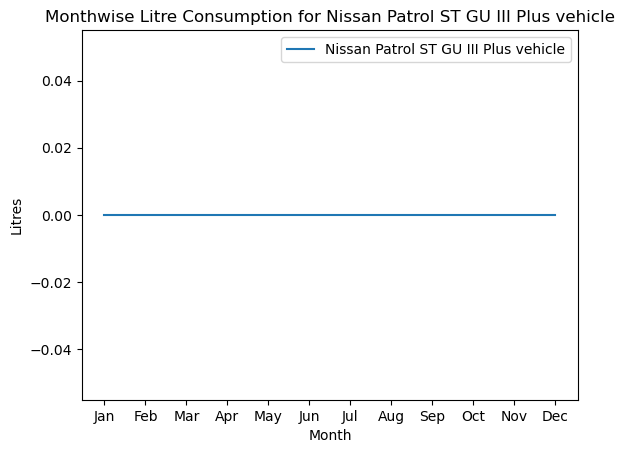

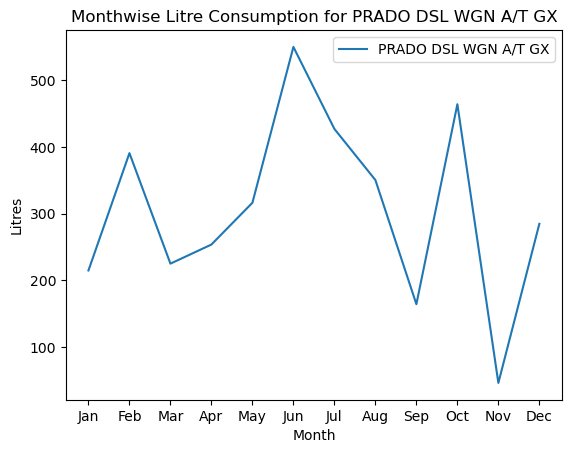

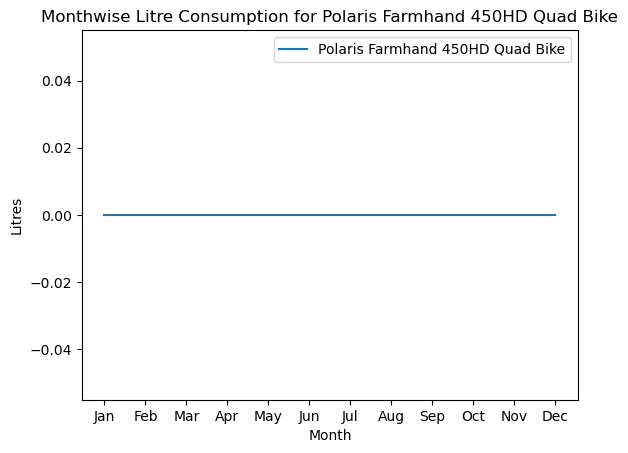

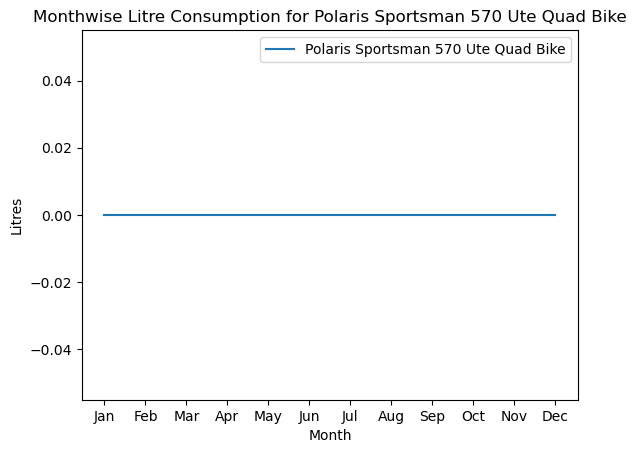

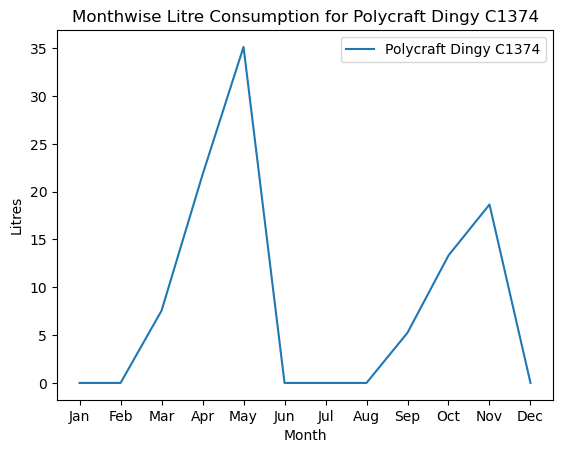

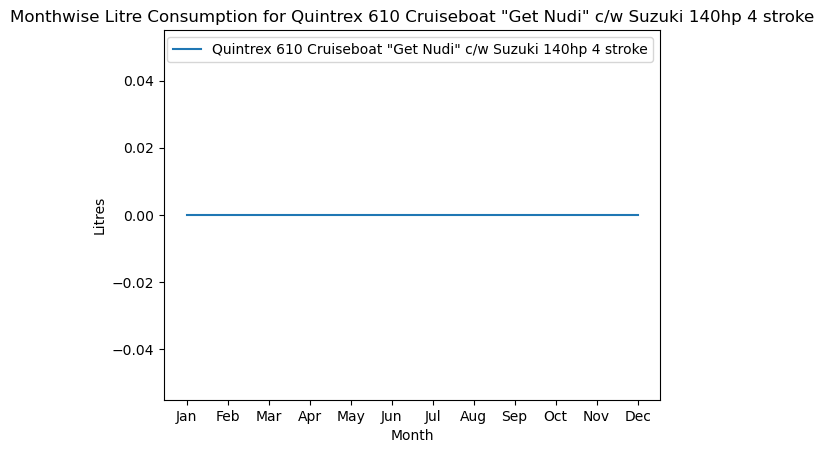

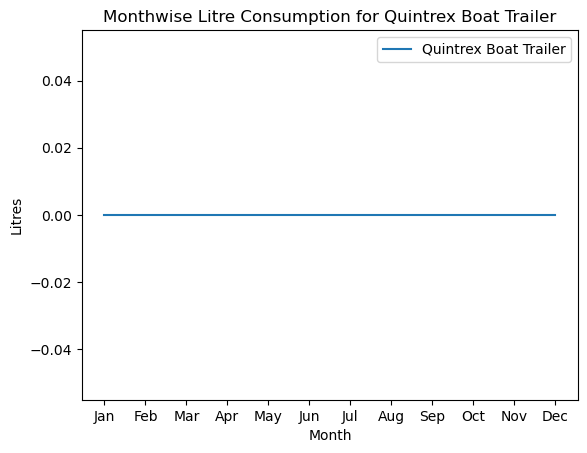

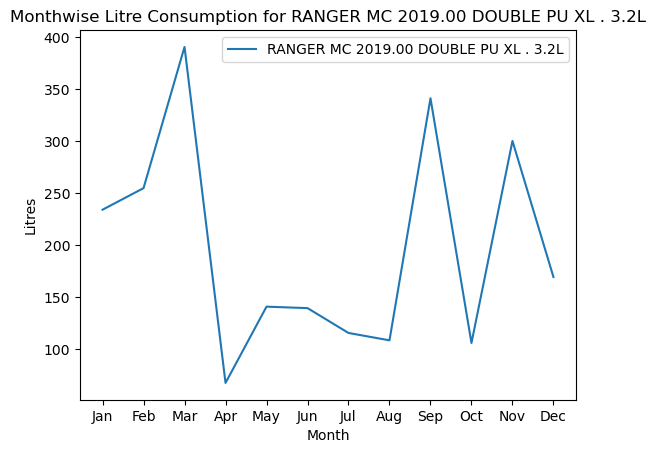

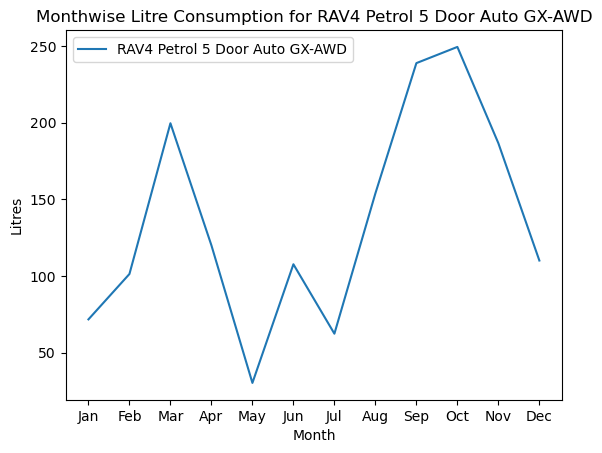

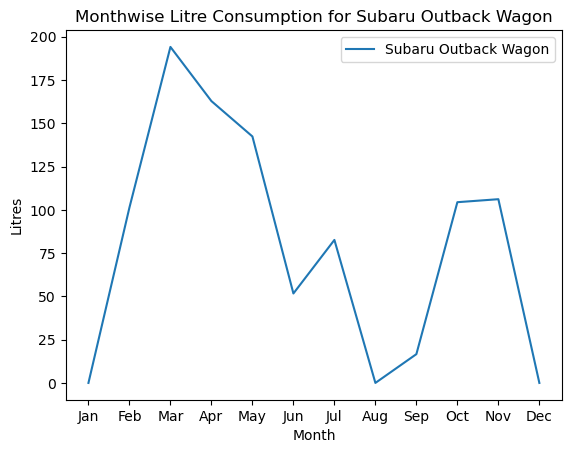

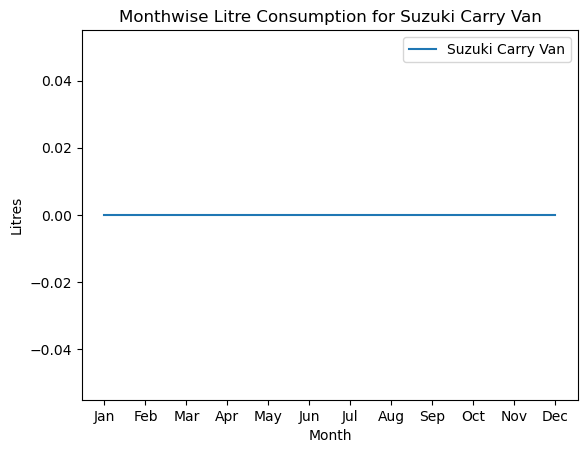

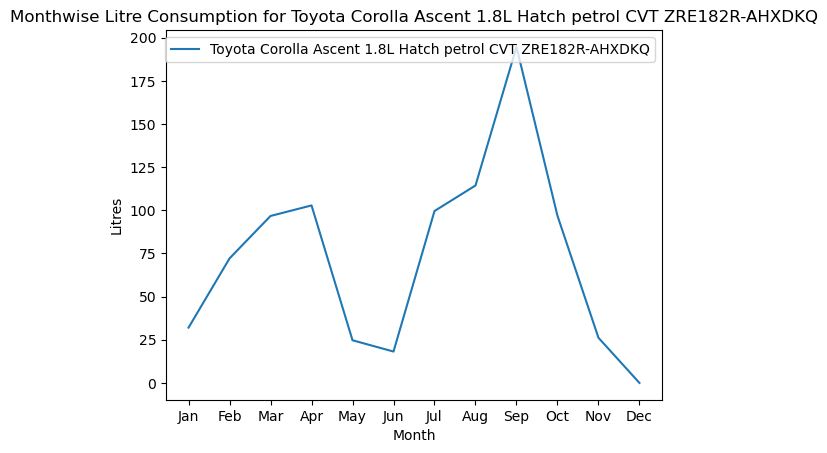

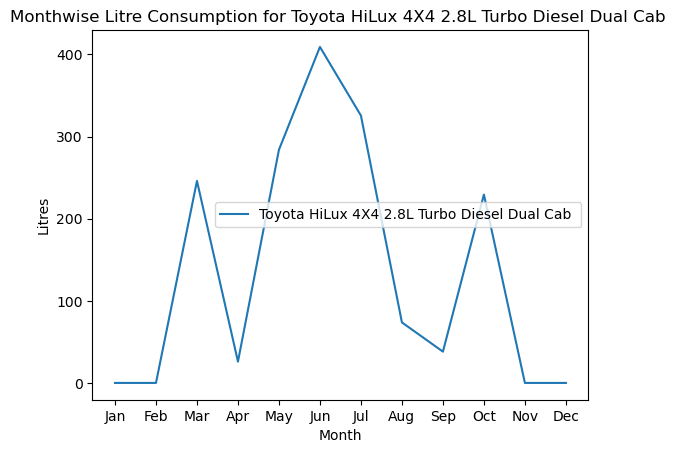

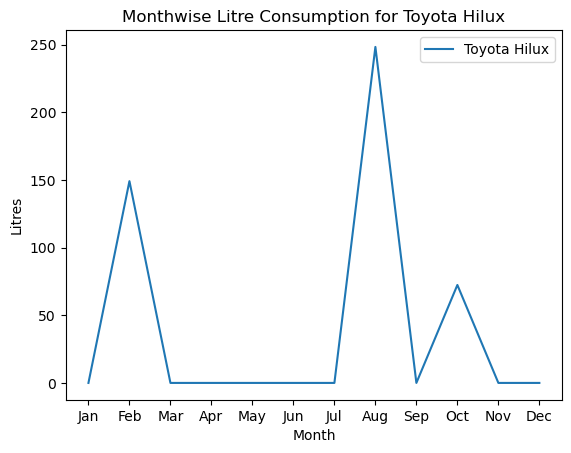

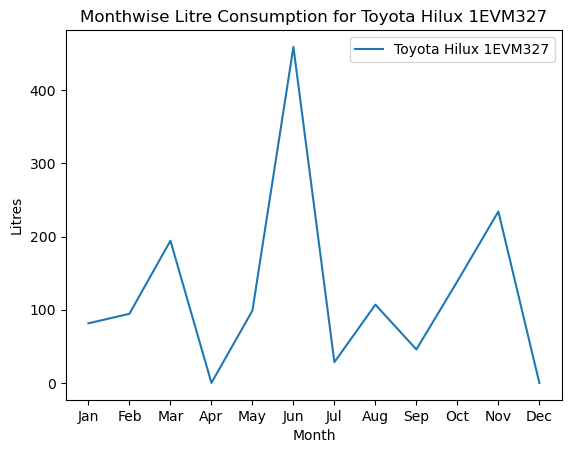

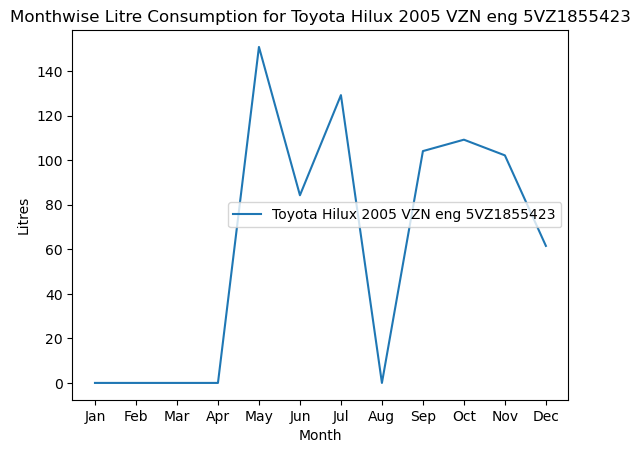

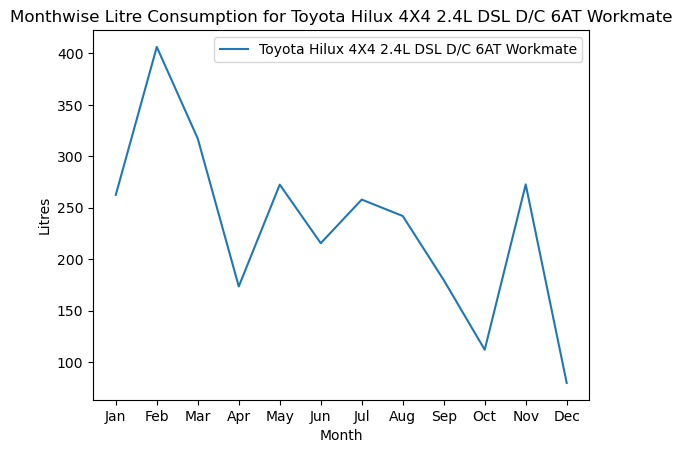

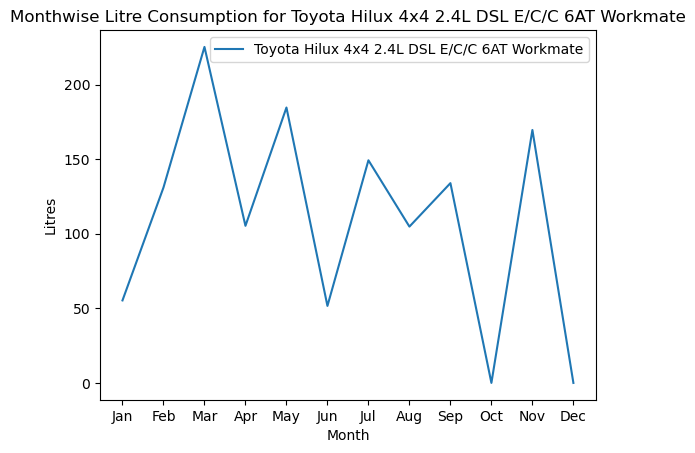

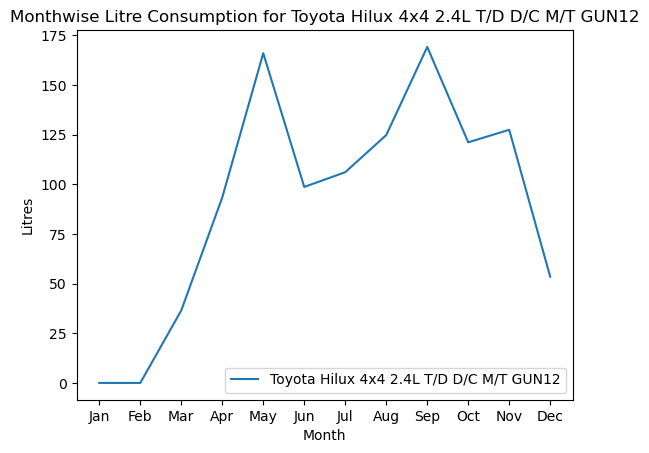

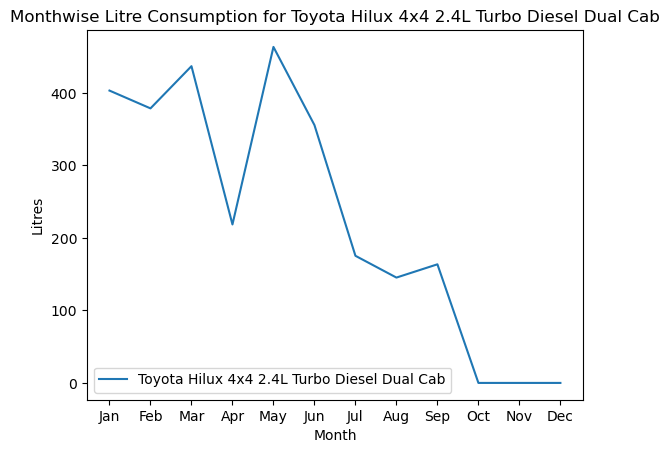

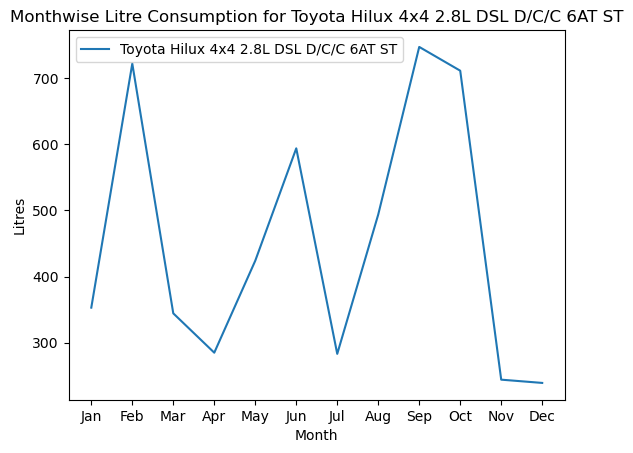

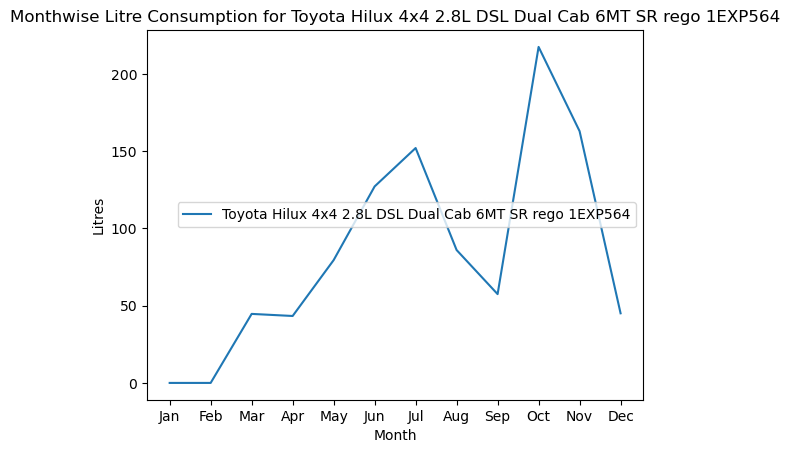

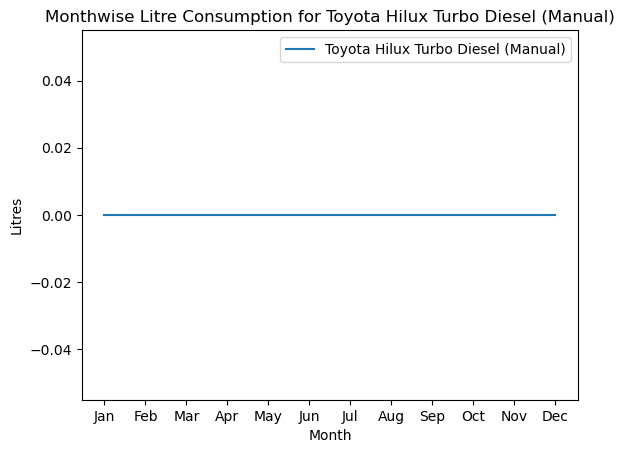

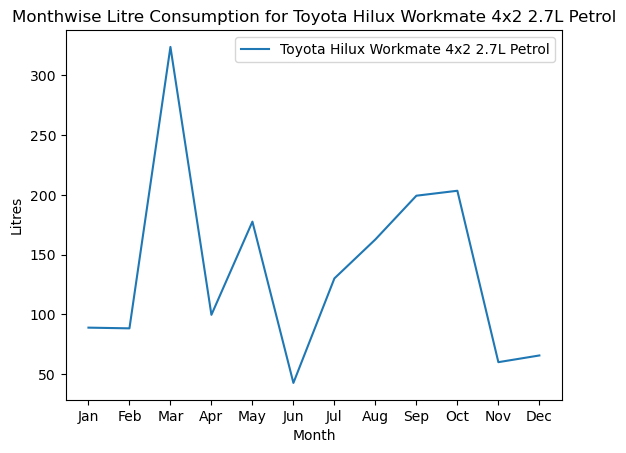

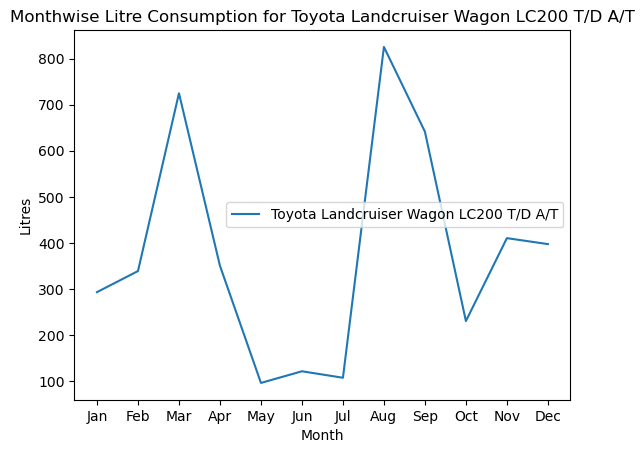

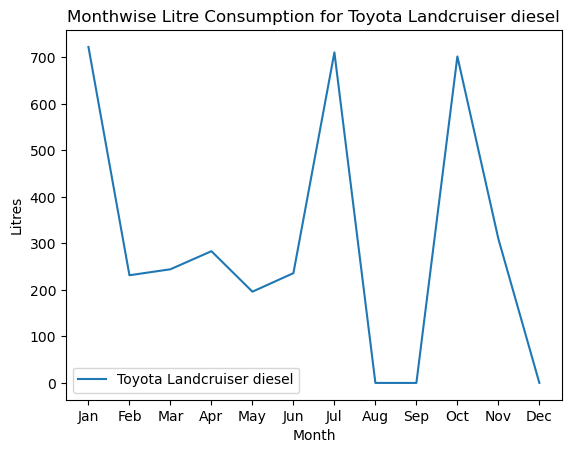

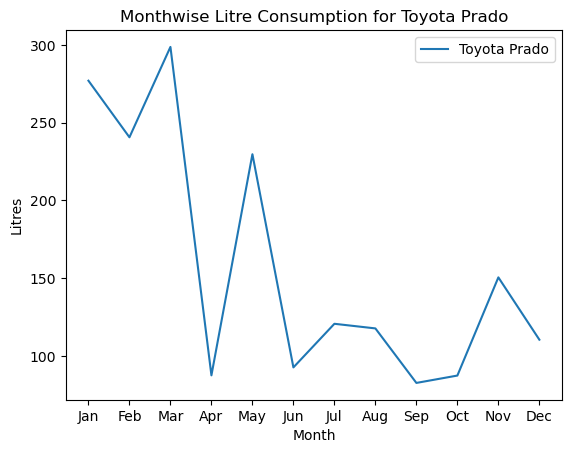

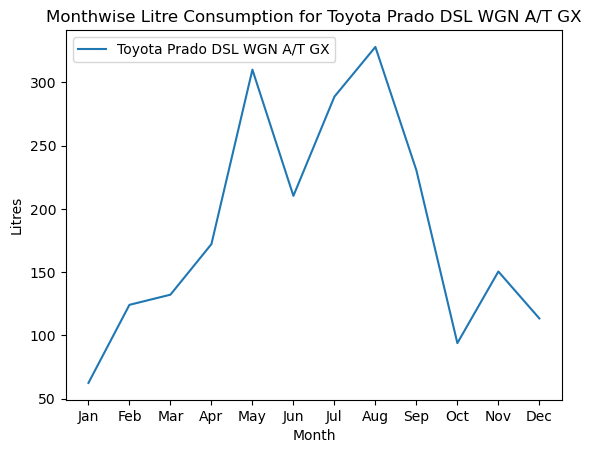

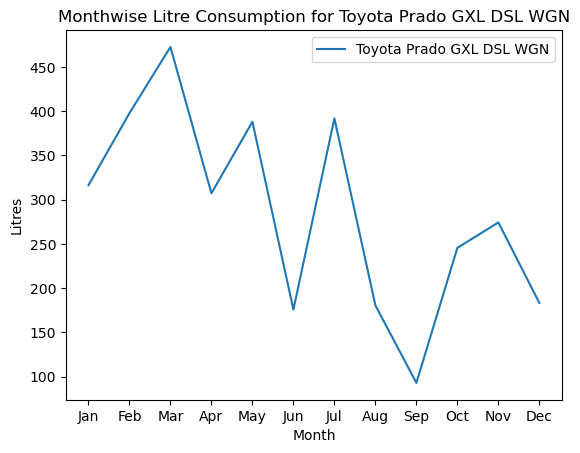

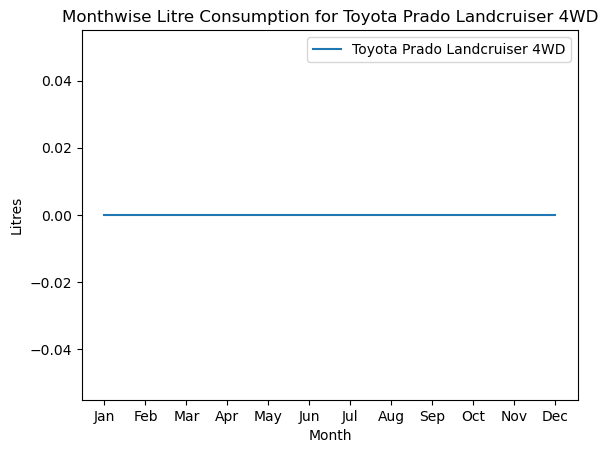

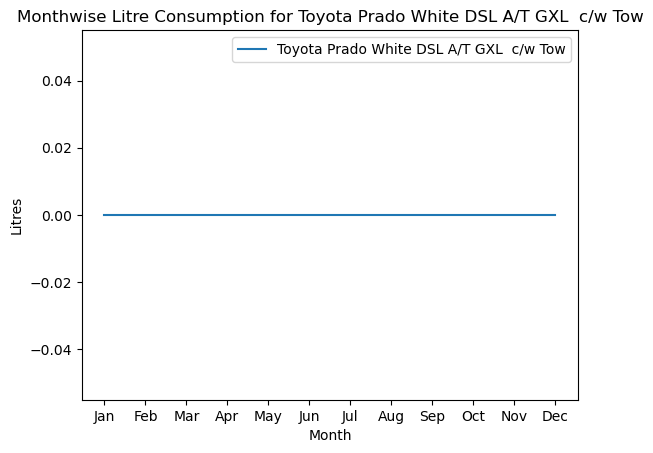

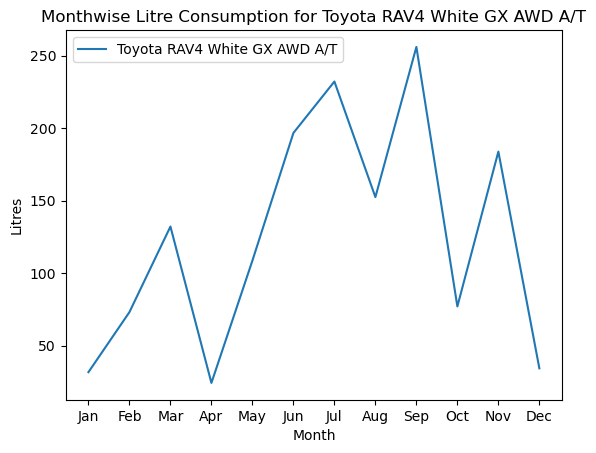

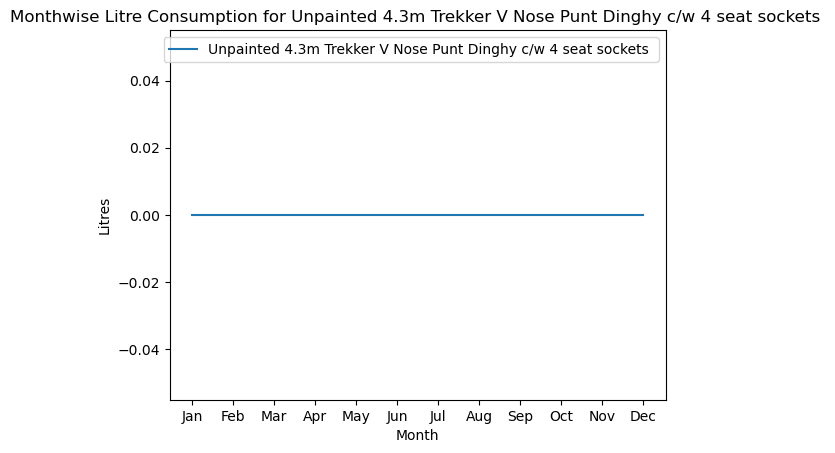

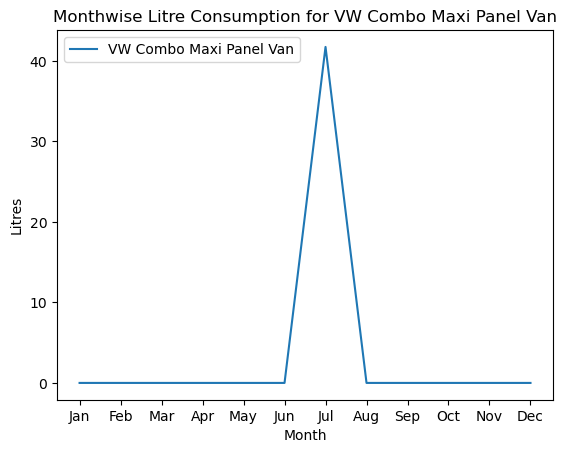

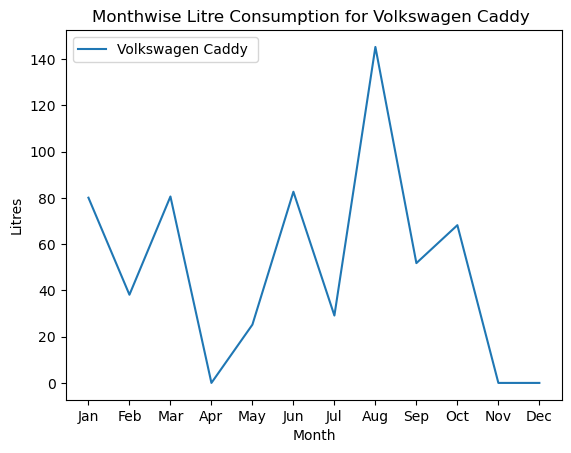

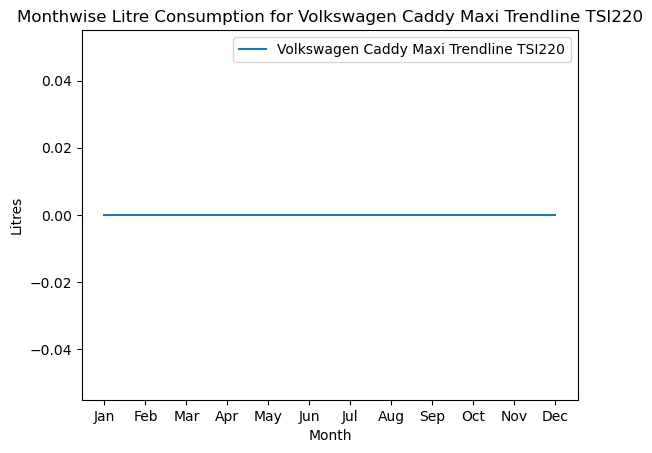

In [14]:
# Group by Vehicle Description and get monthwise litre consumption for each
grouped = df_cleaned.groupby('Vehicle Description')[[f'{month}-2022_Ltr' for month in months]]

# Plot monthwise litre consumption for each Vehicle Description separately
plt.figure(figsize=(12, 6))
for vehicle_desc, data in grouped:
    plt.plot(months, data.values[0], label=vehicle_desc)
    plt.xlabel('Month')
    plt.ylabel('Litres')
    plt.title('Monthwise Litre Consumption for ' + vehicle_desc)
    plt.legend()
    plt.show()

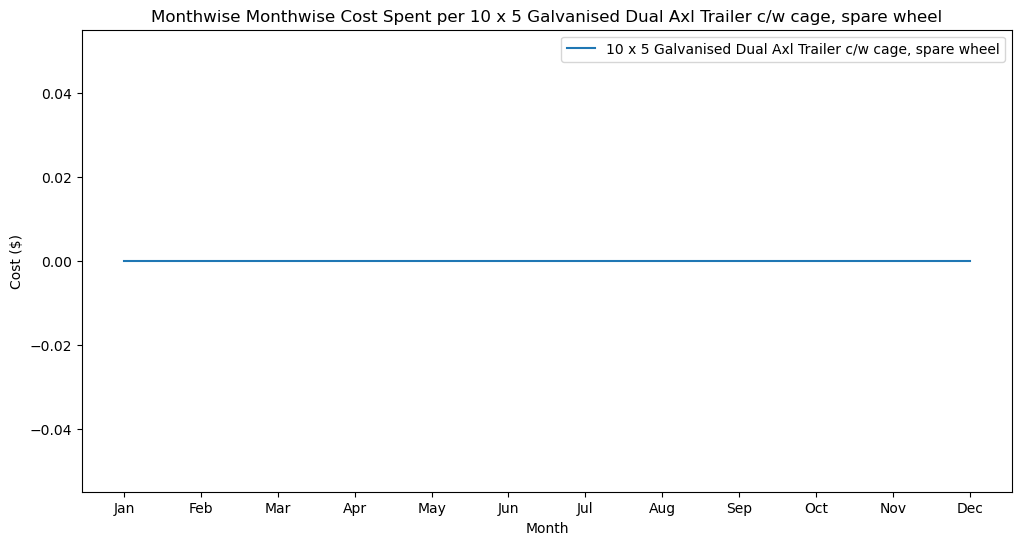

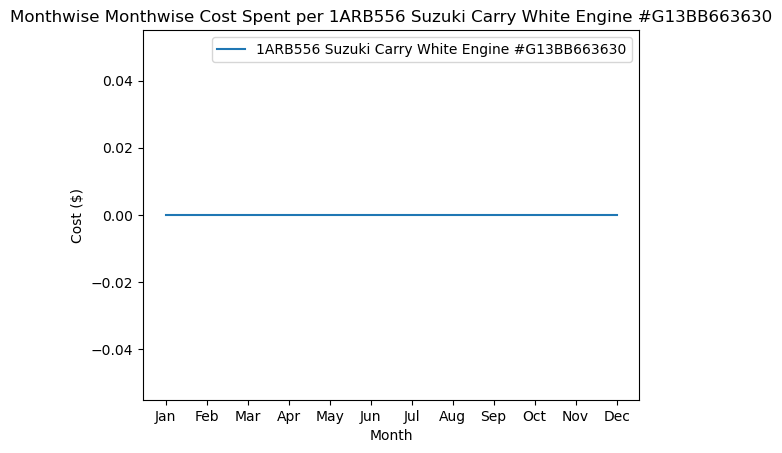

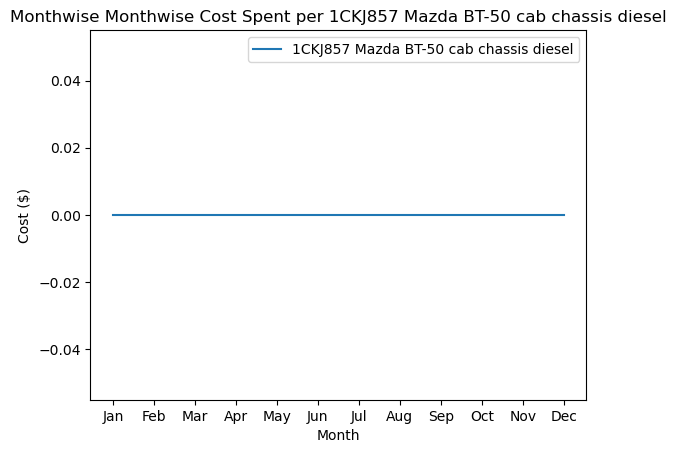

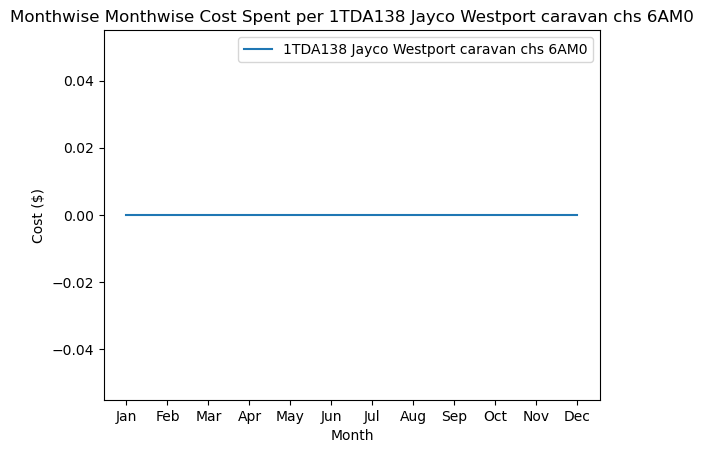

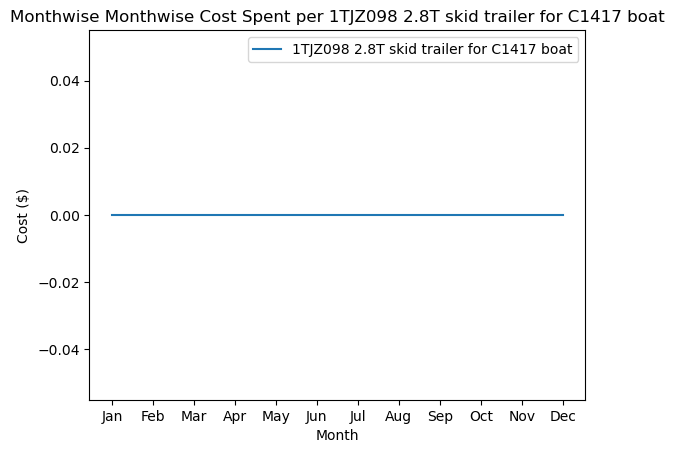

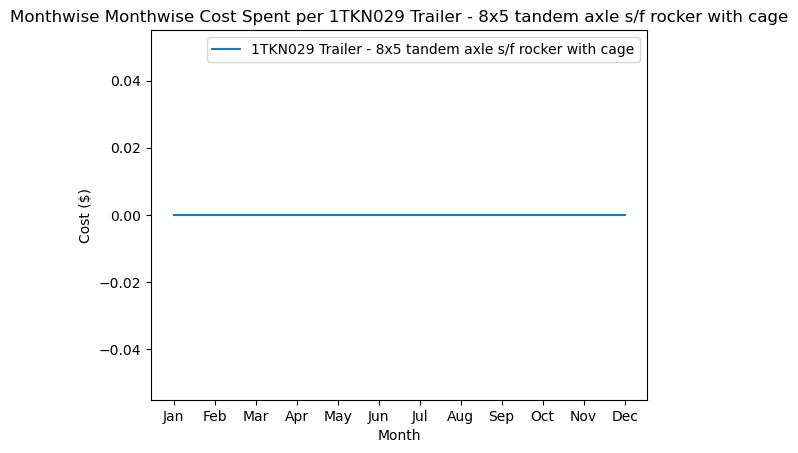

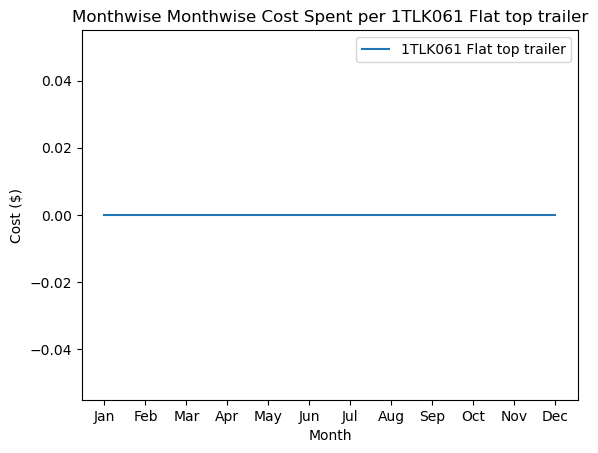

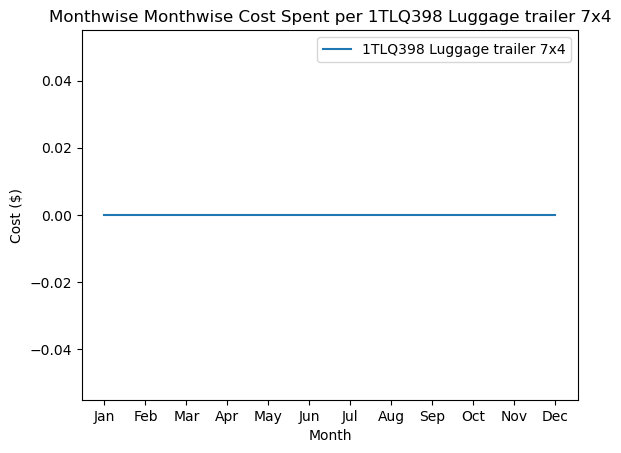

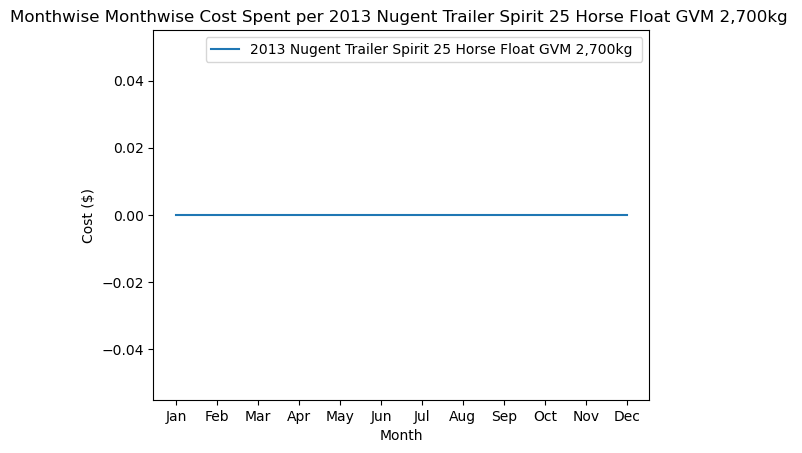

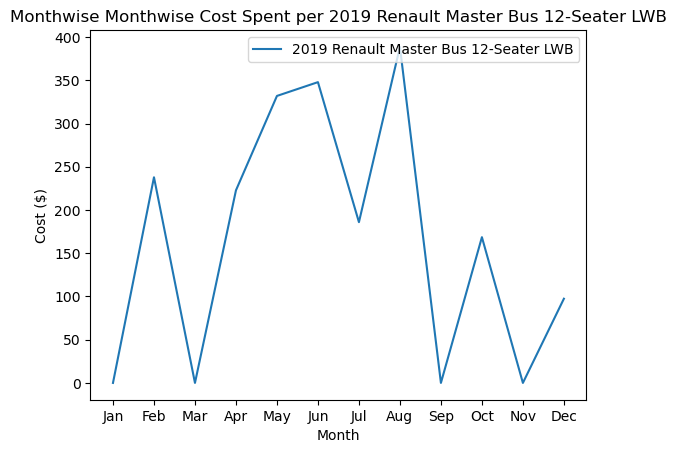

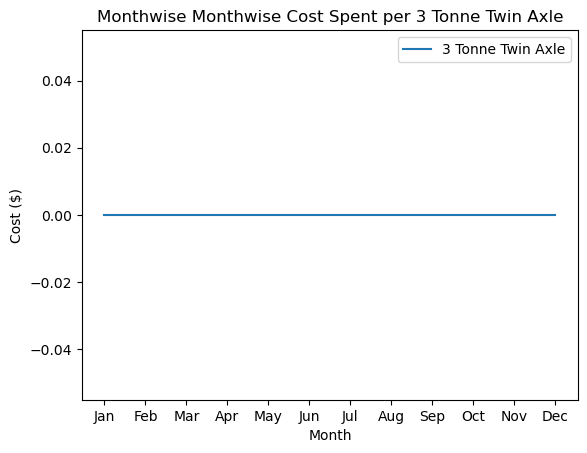

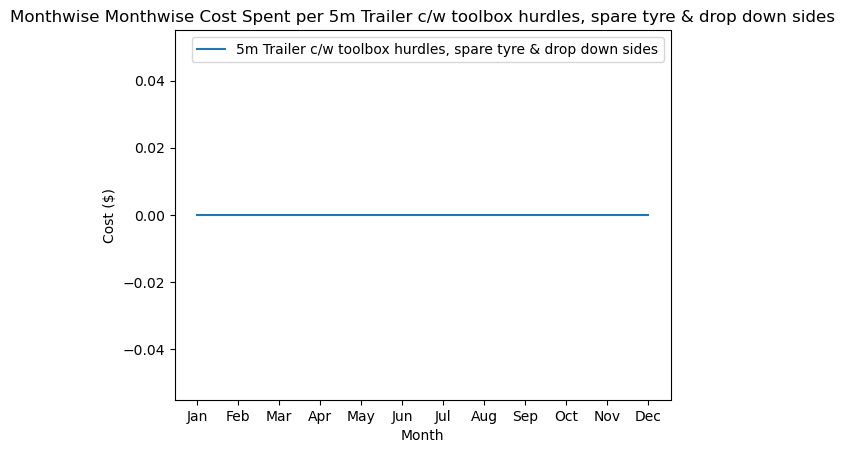

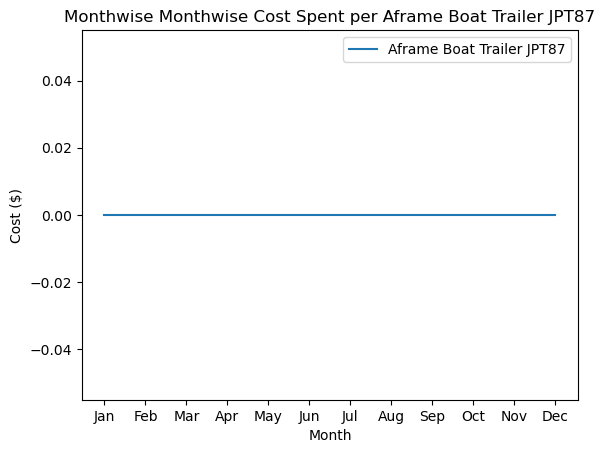

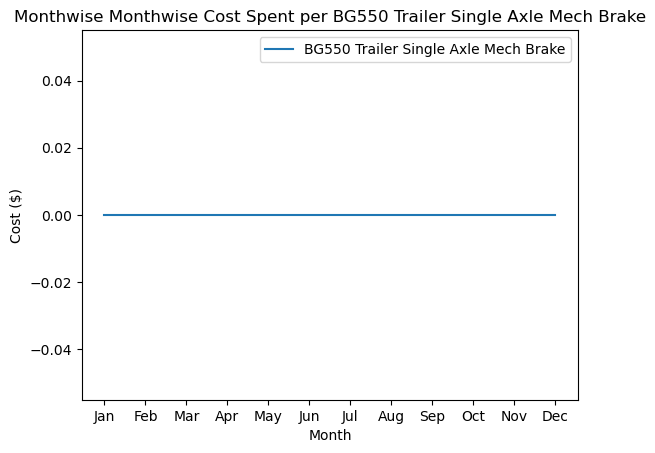

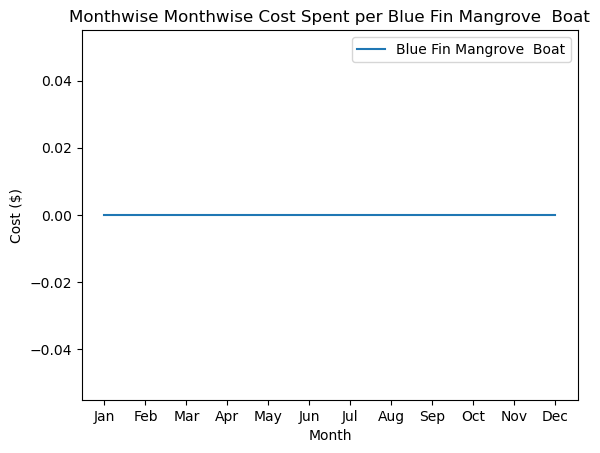

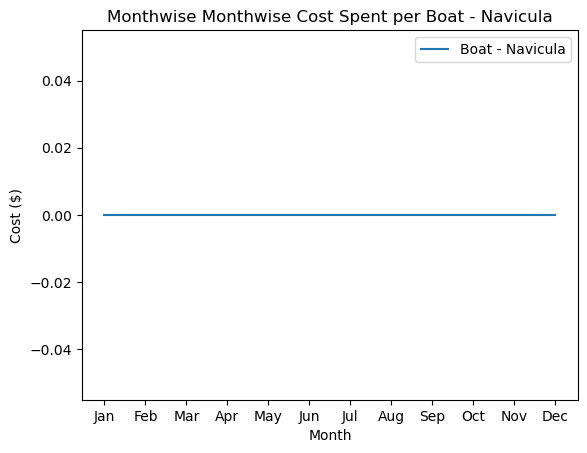

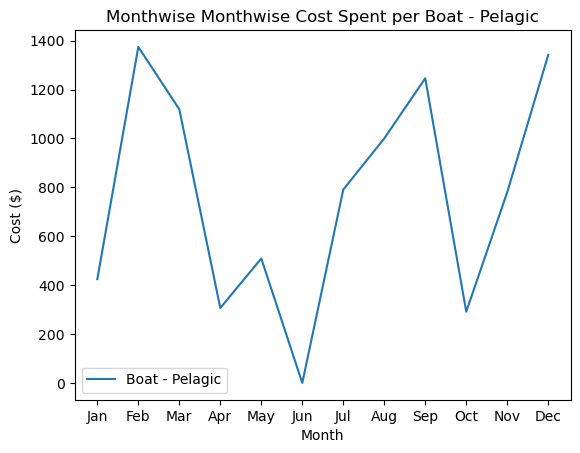

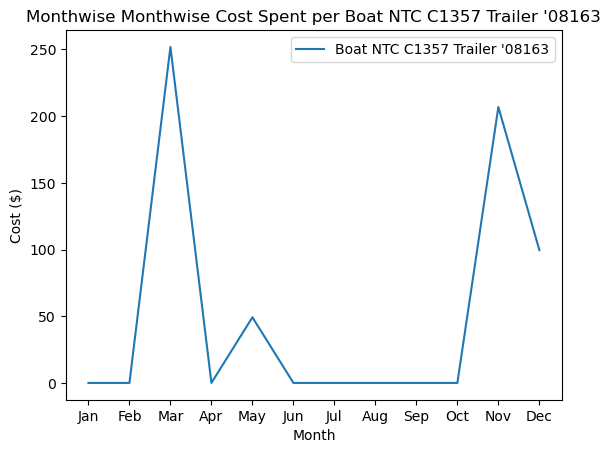

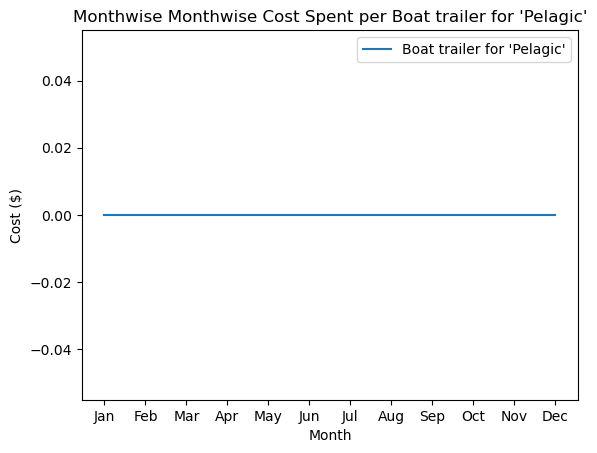

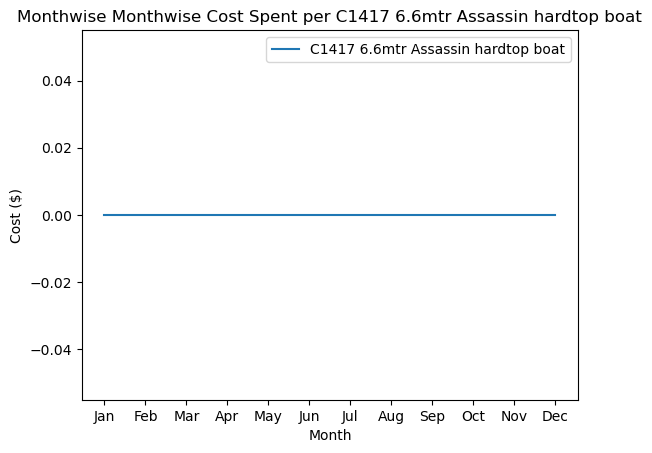

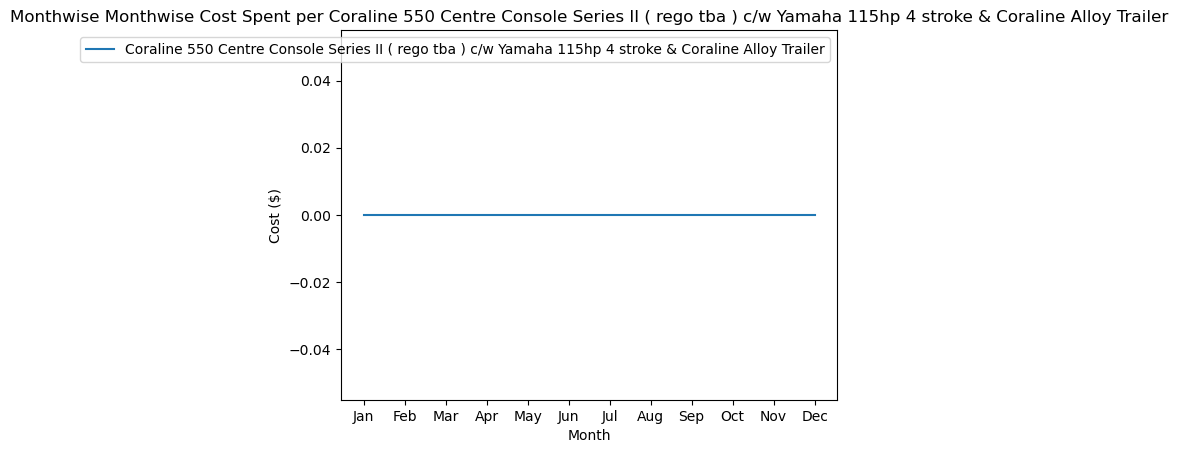

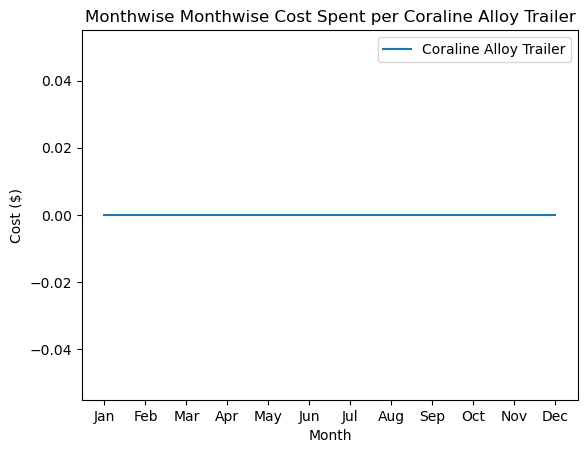

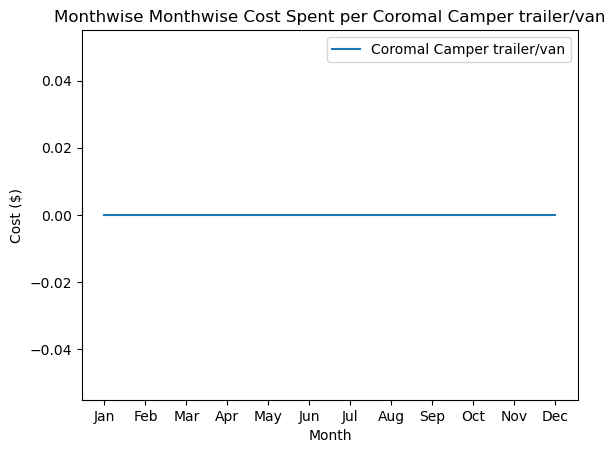

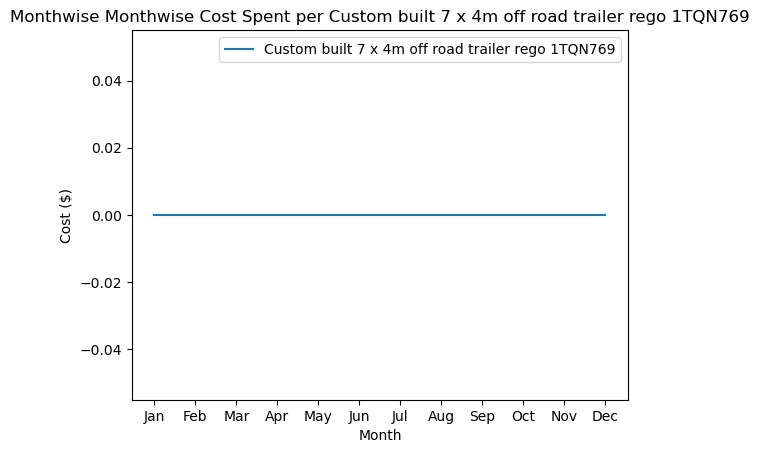

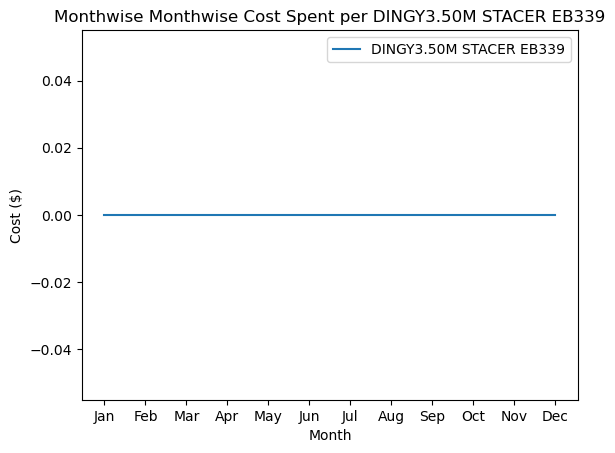

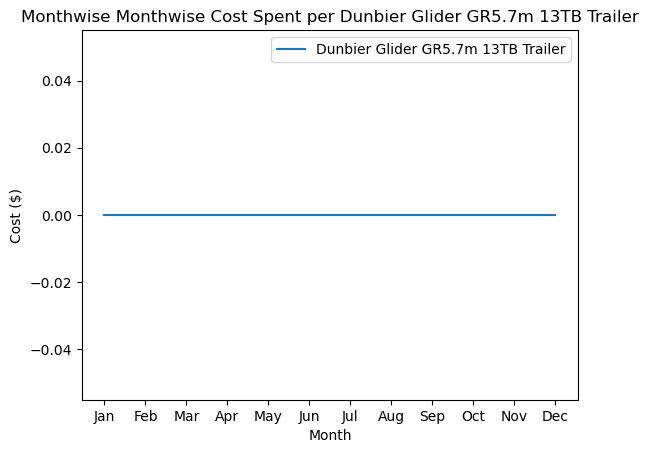

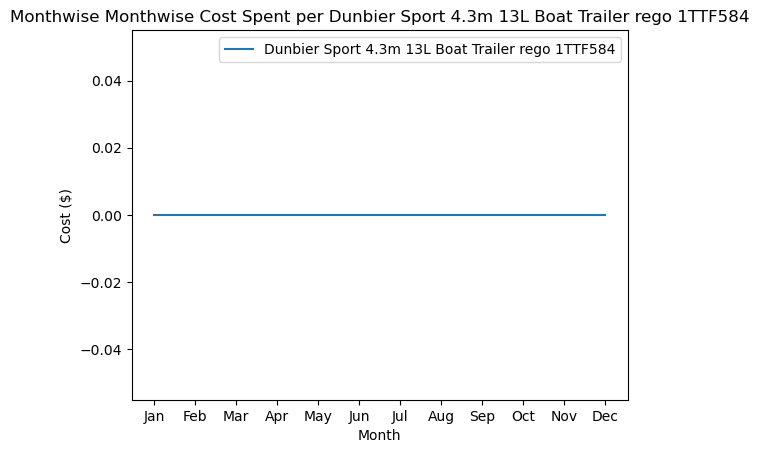

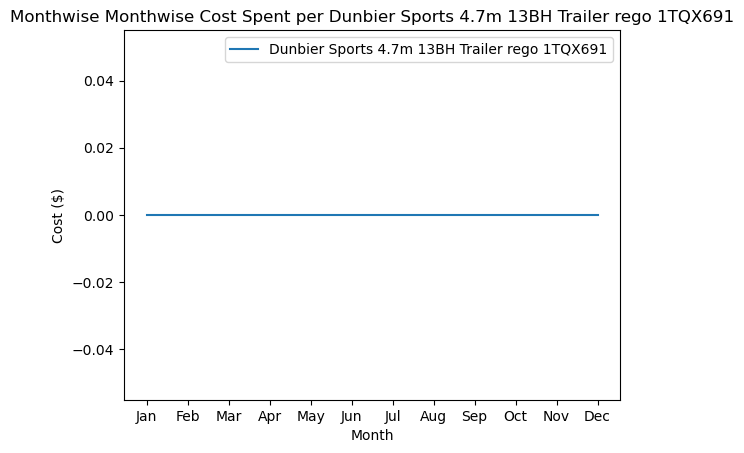

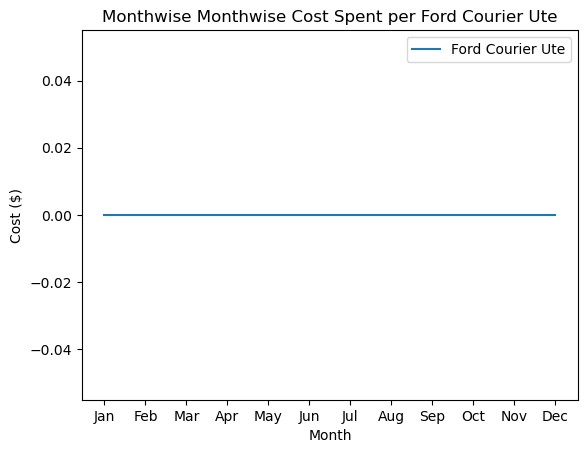

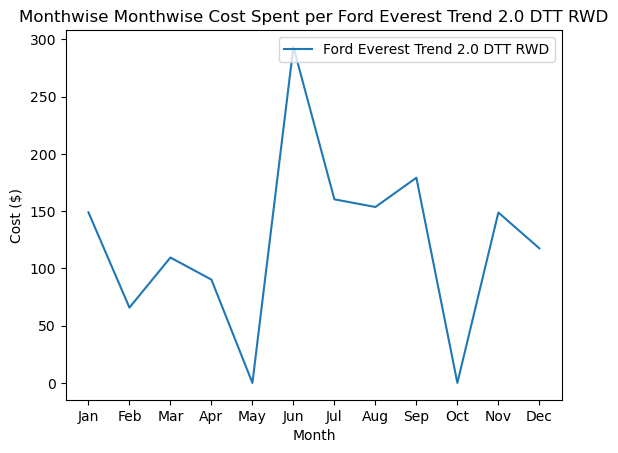

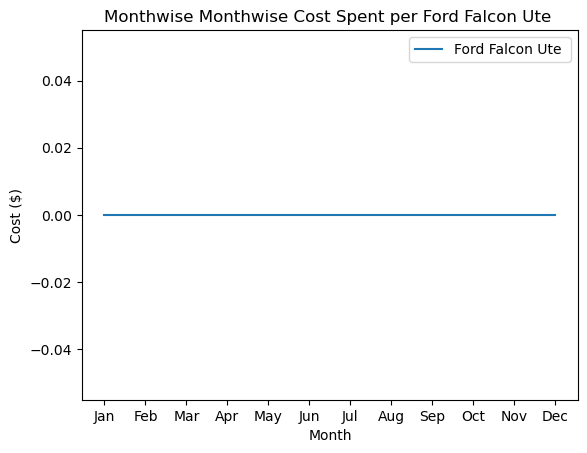

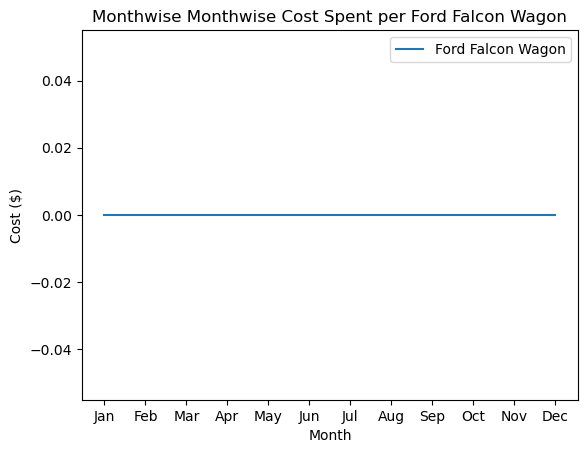

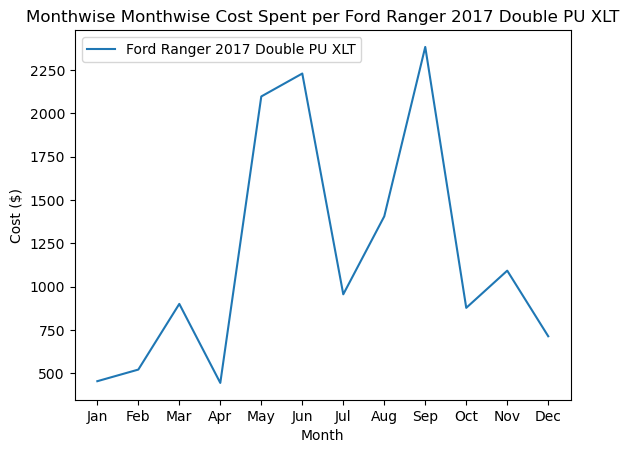

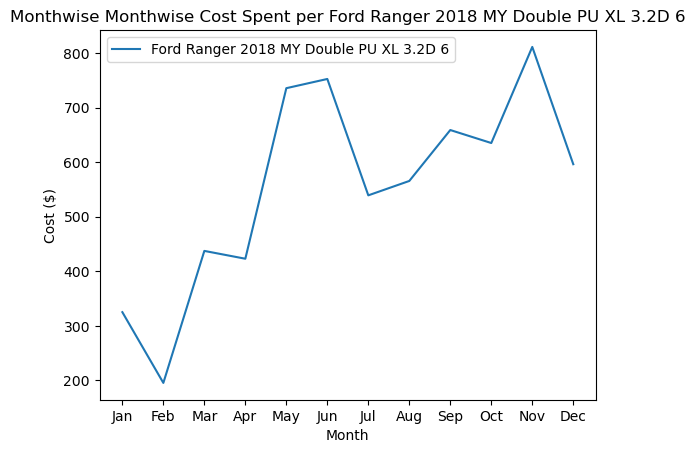

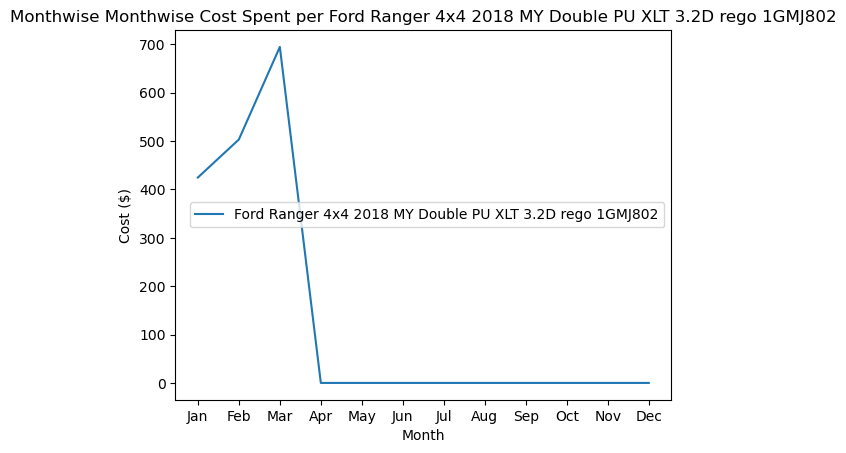

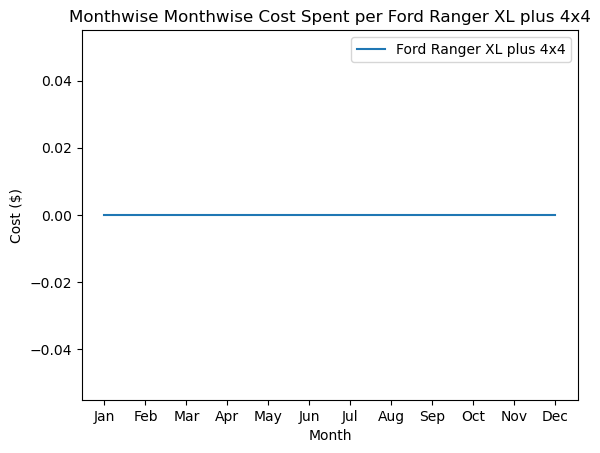

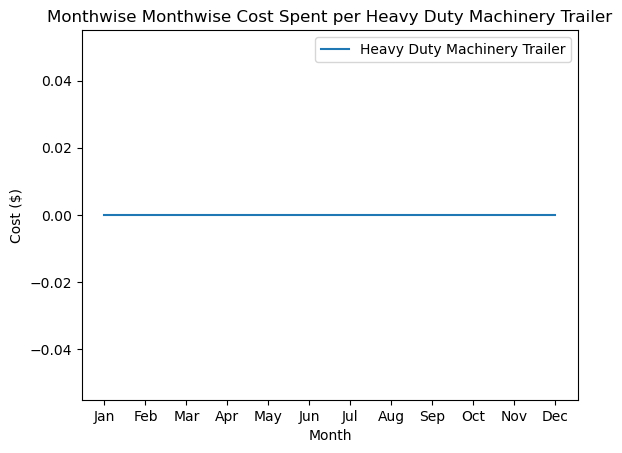

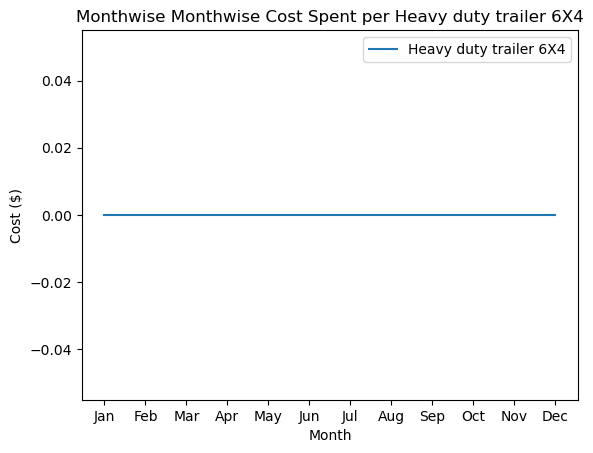

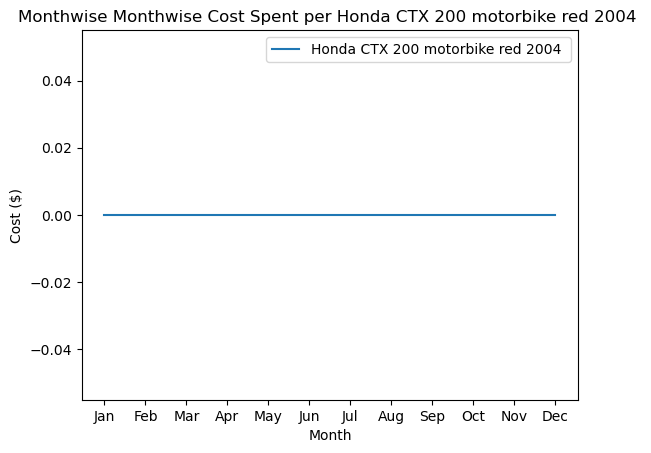

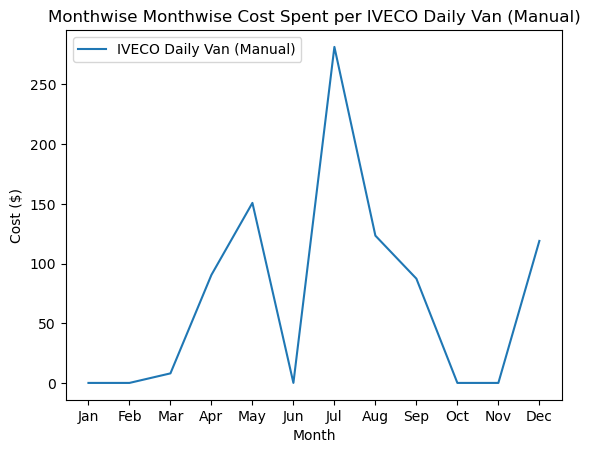

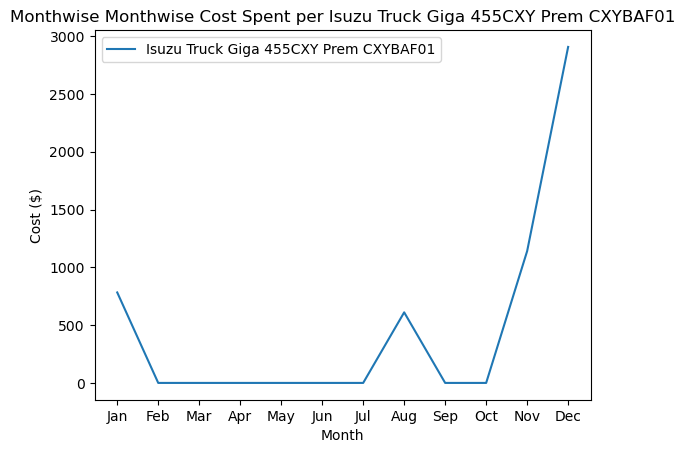

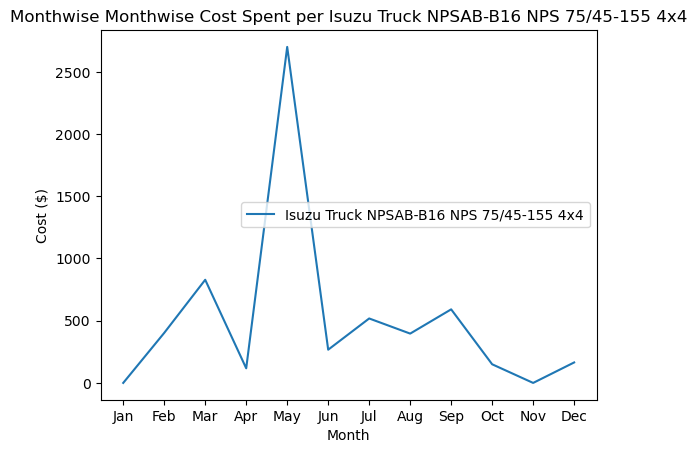

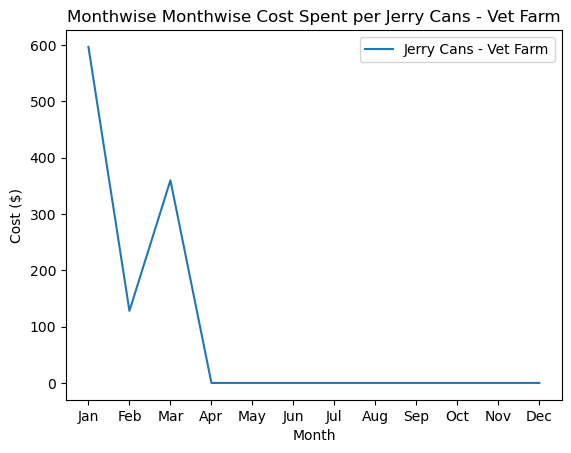

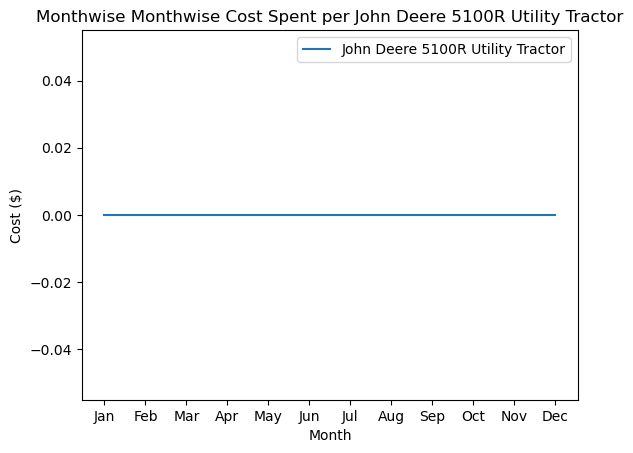

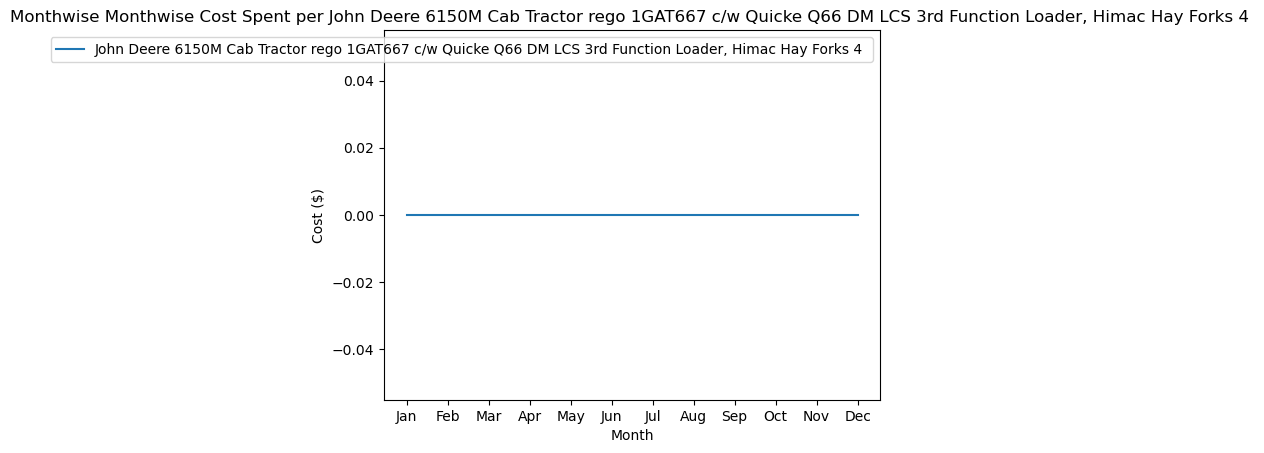

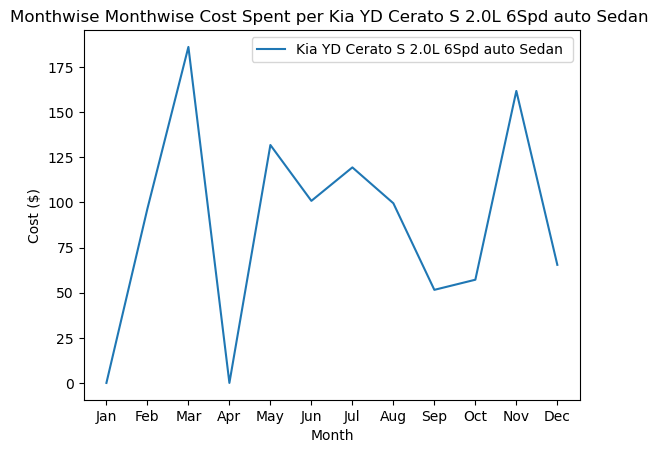

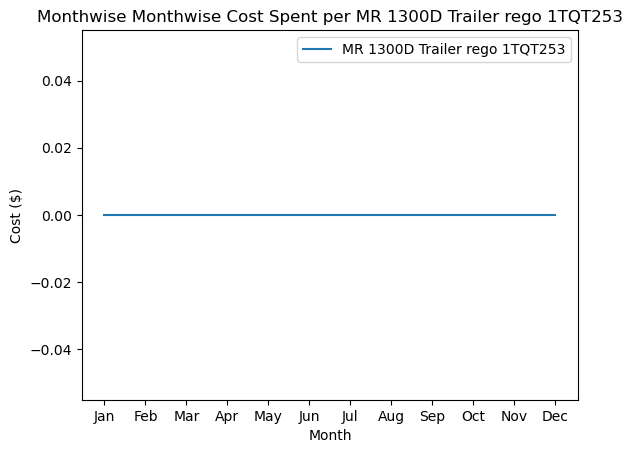

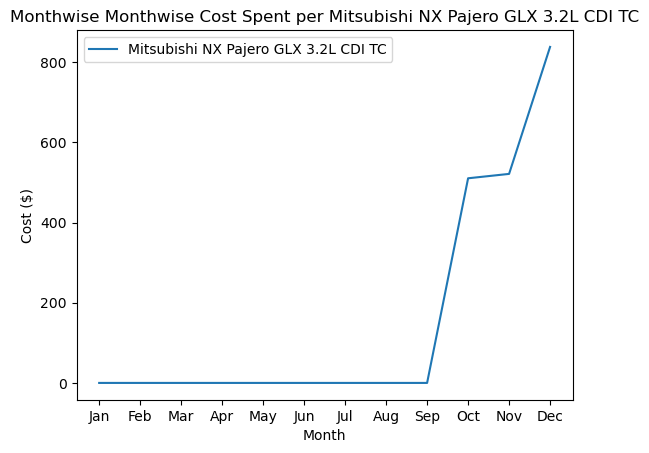

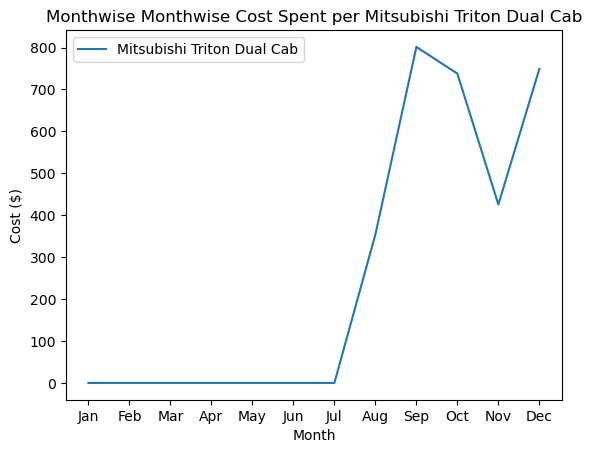

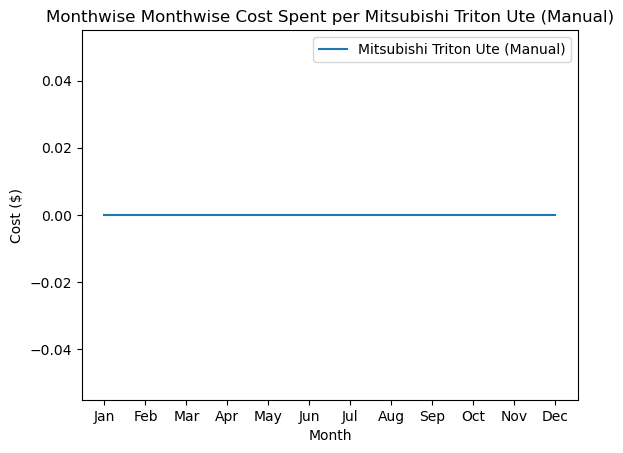

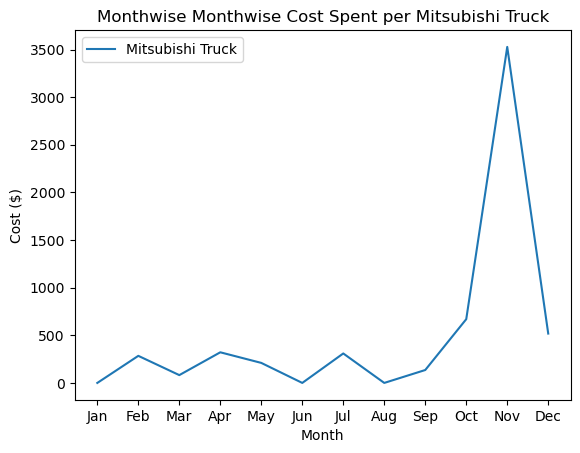

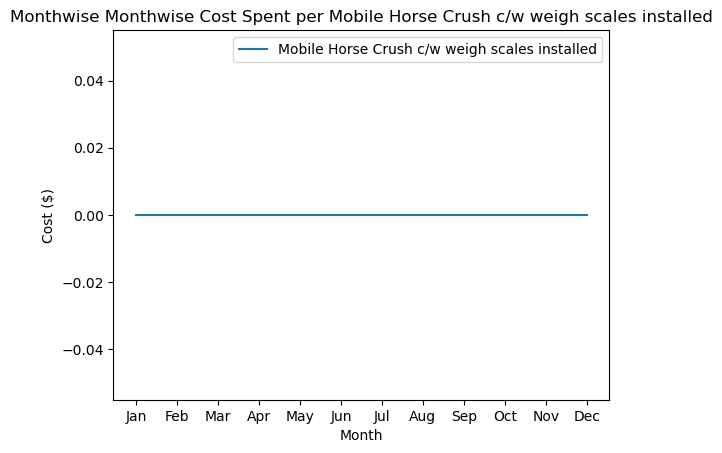

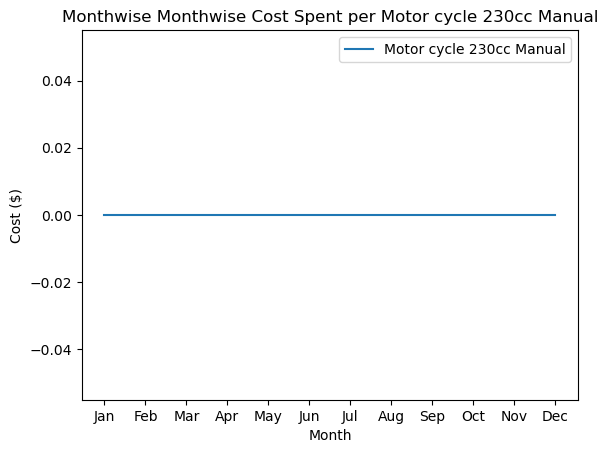

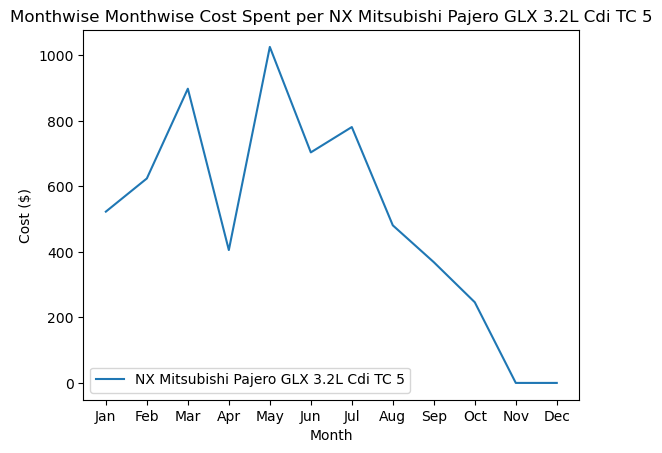

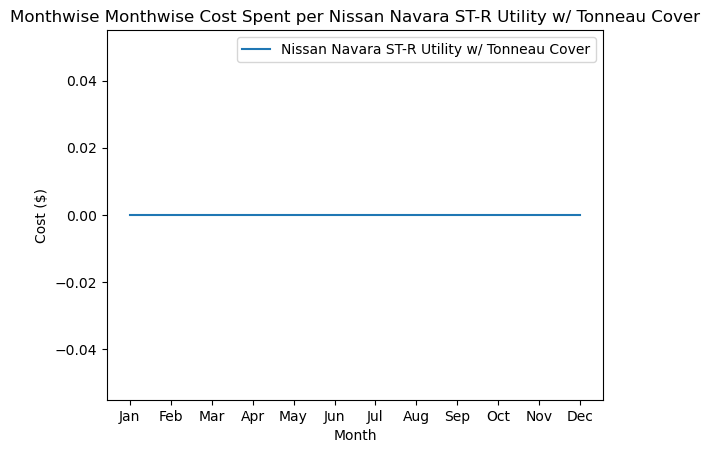

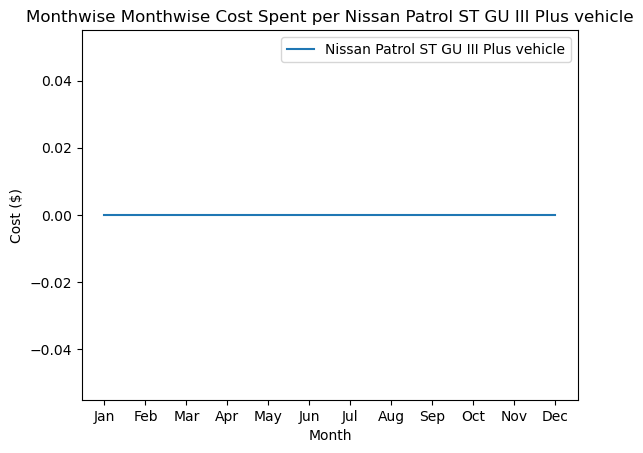

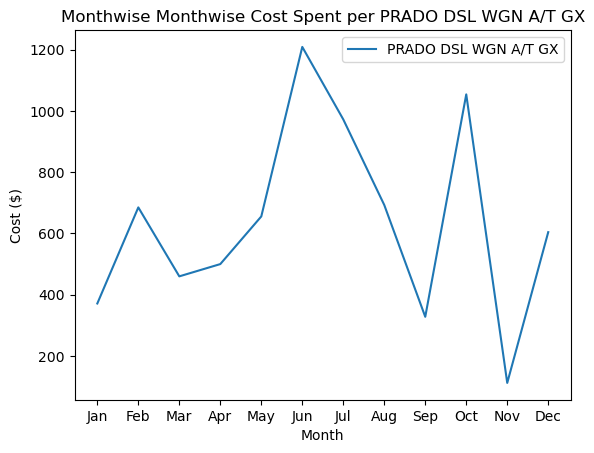

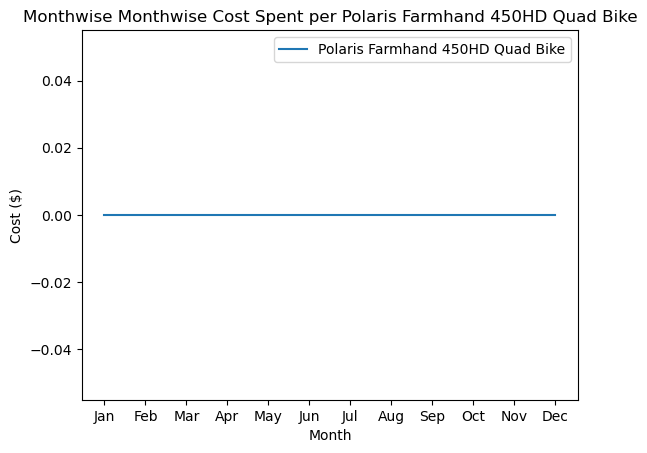

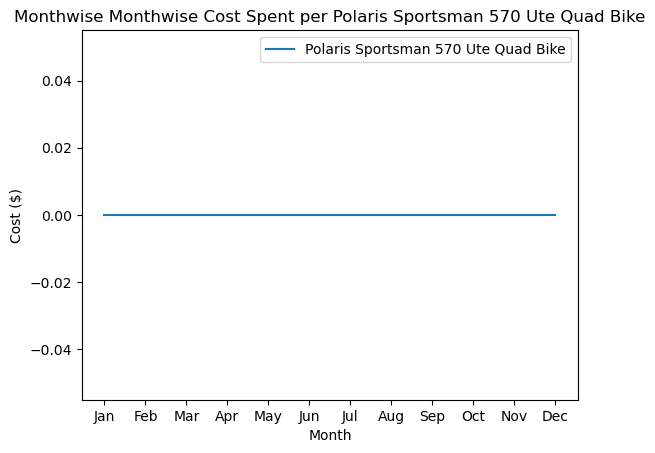

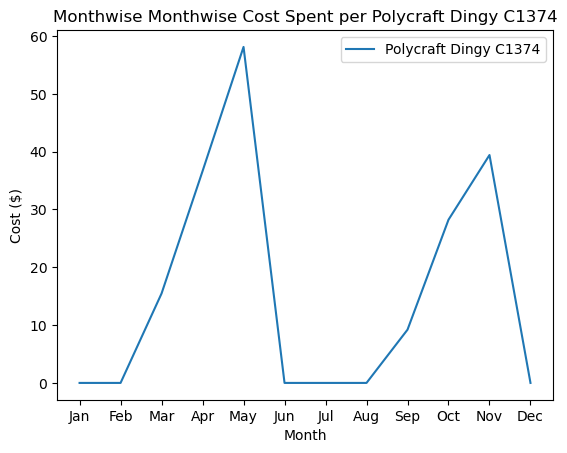

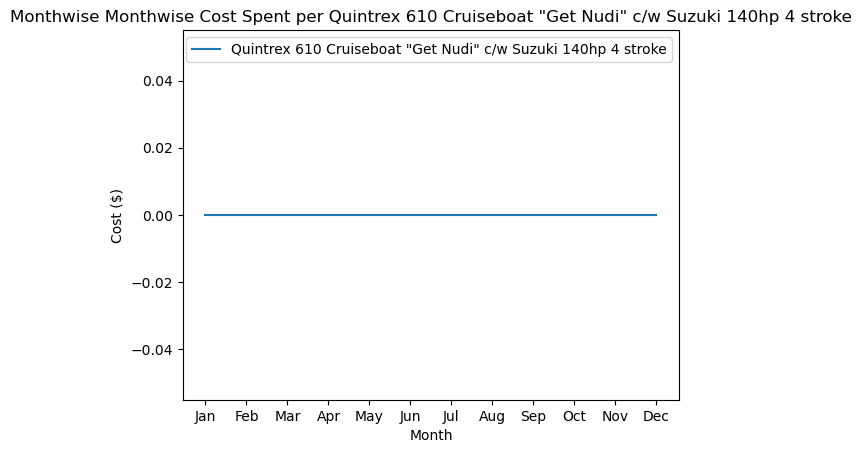

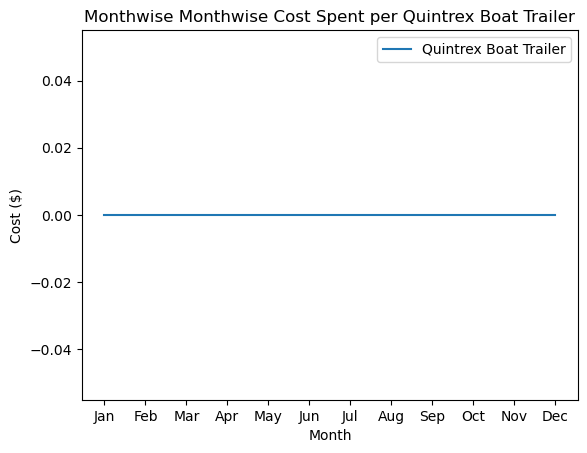

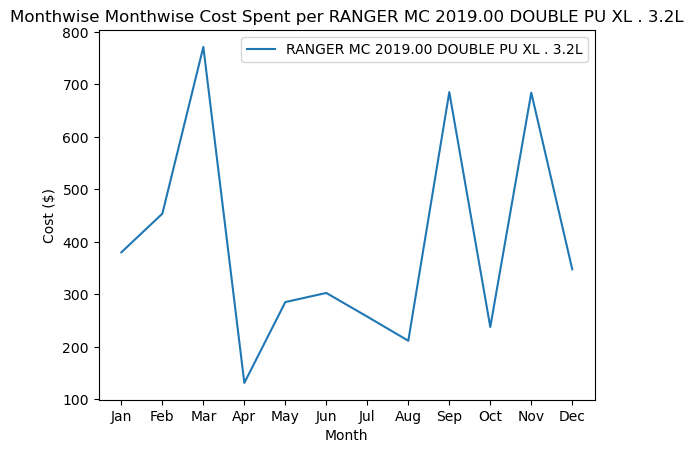

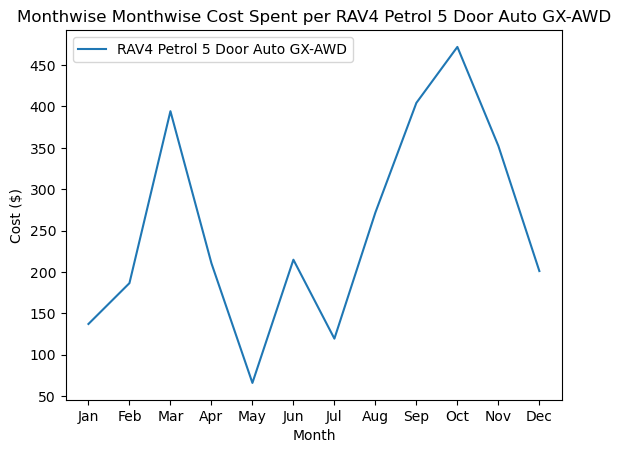

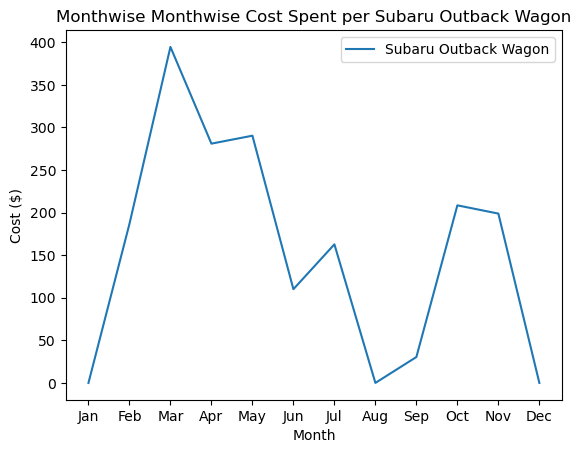

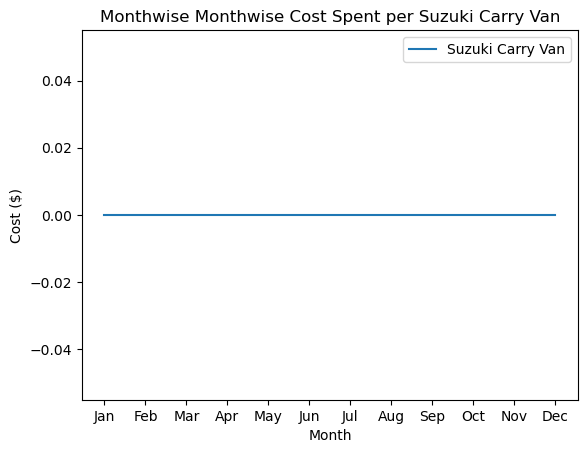

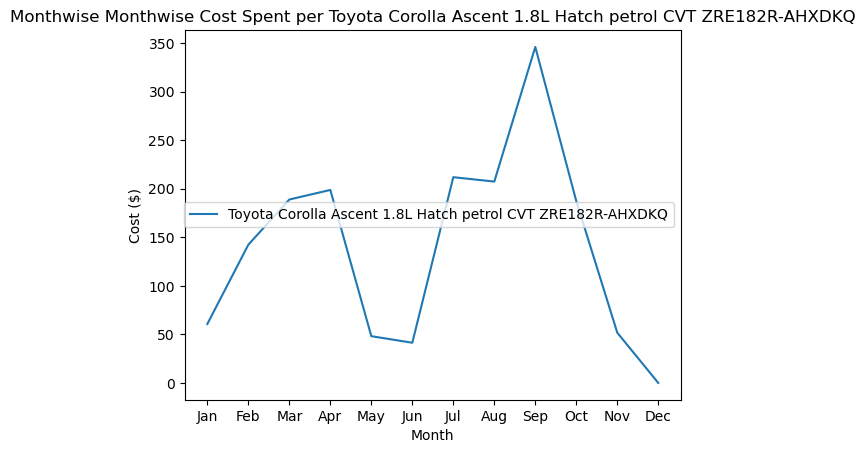

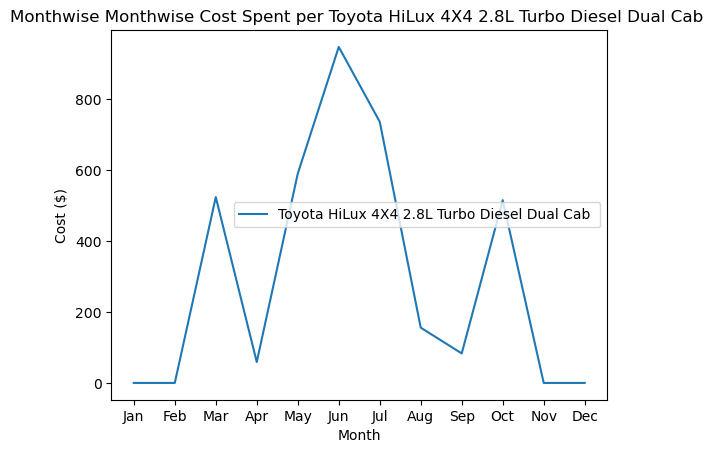

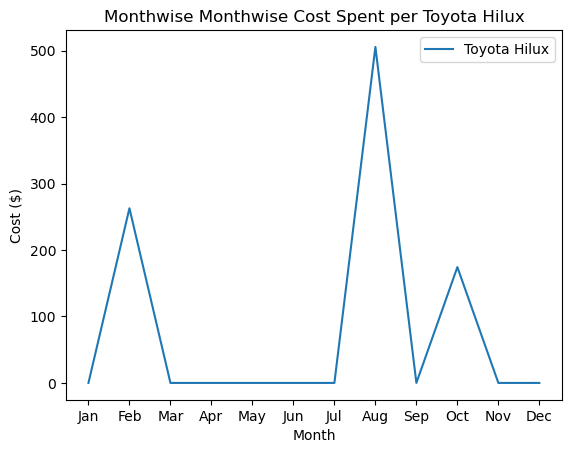

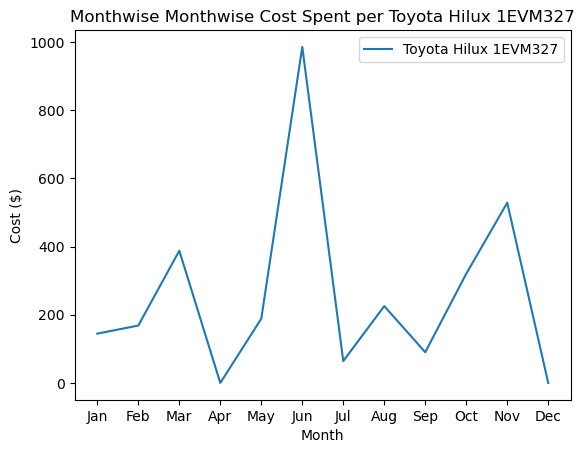

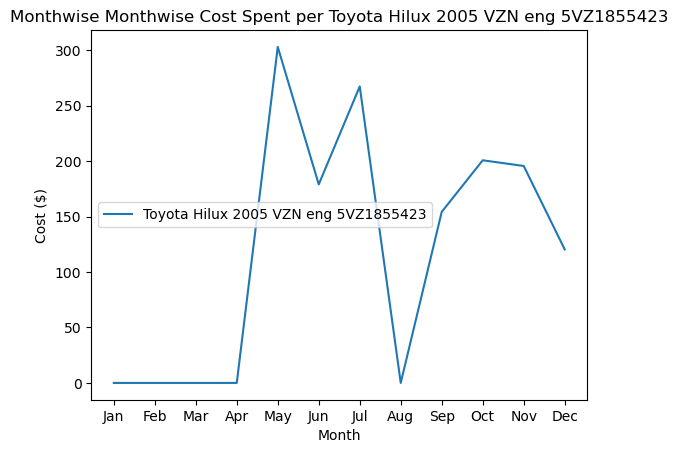

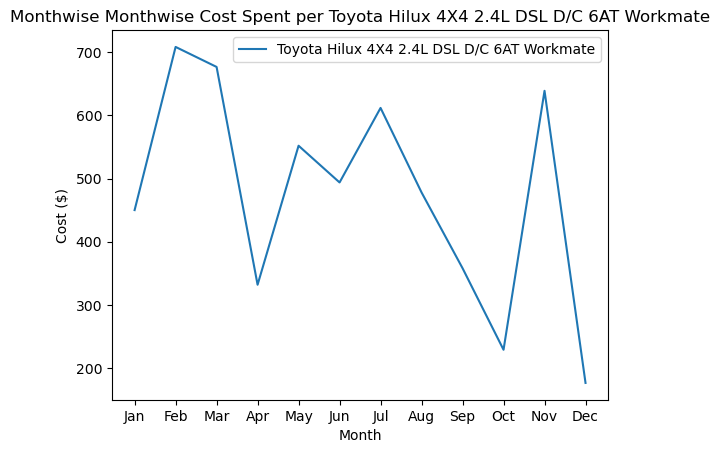

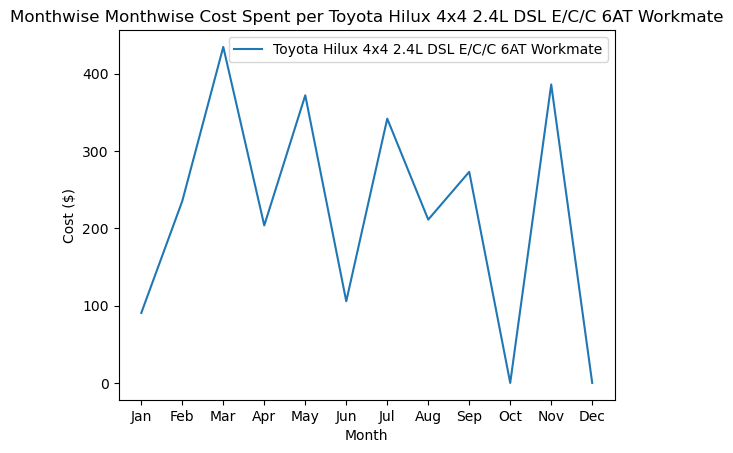

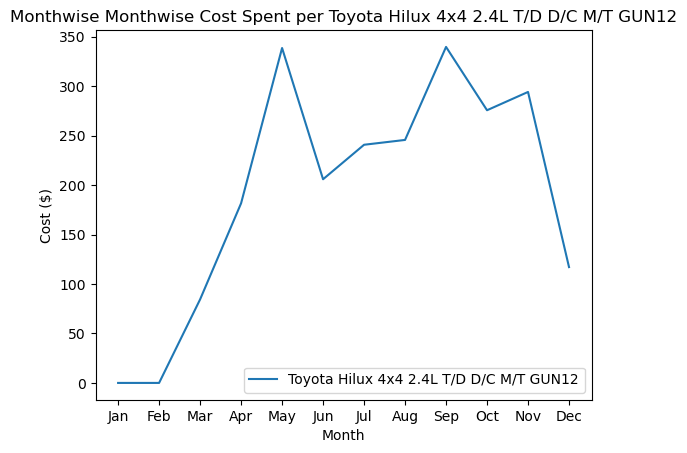

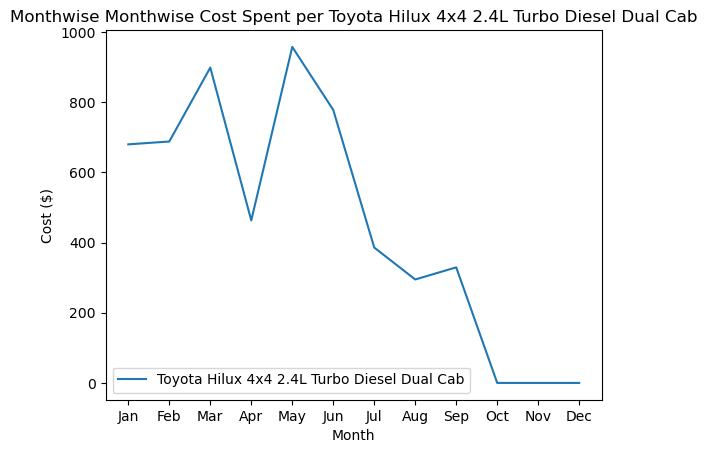

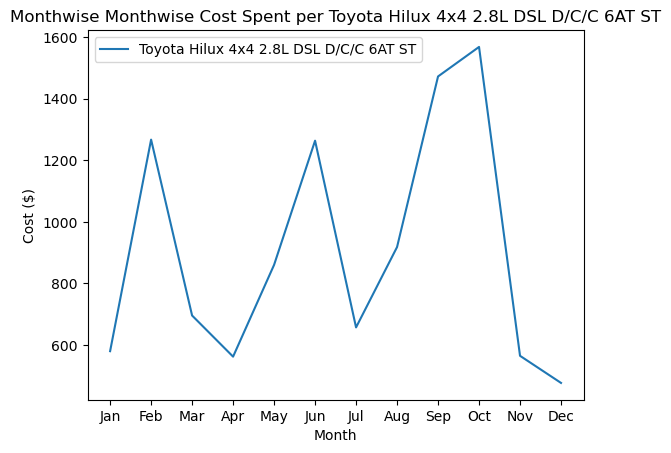

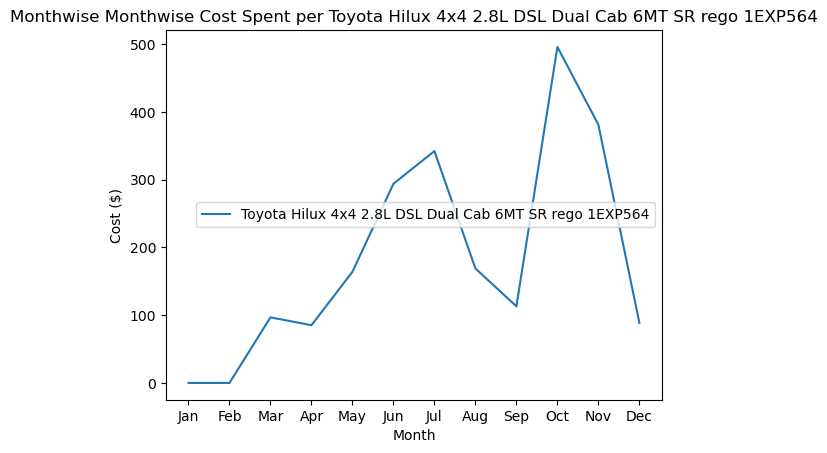

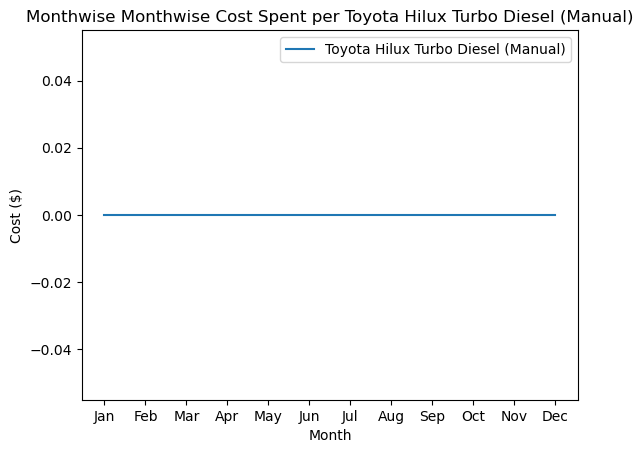

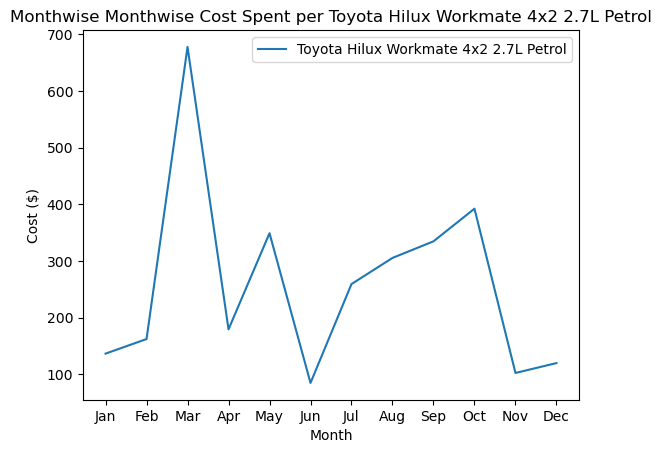

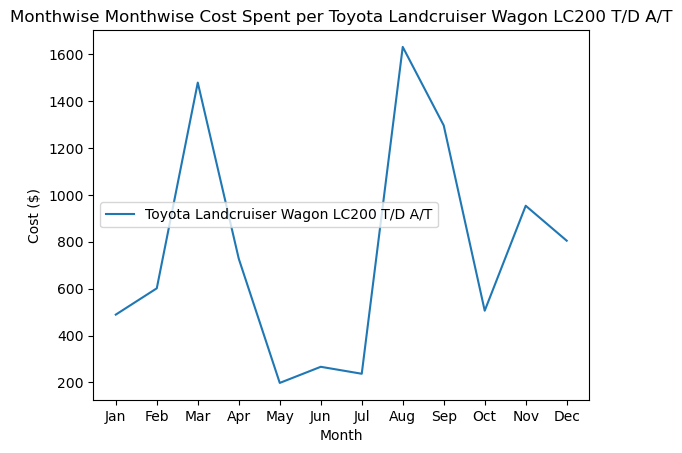

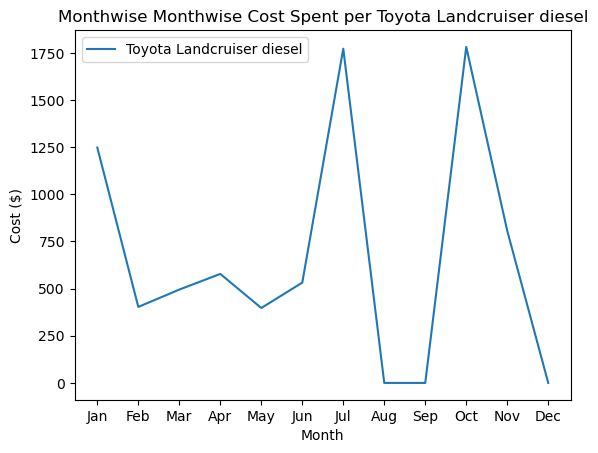

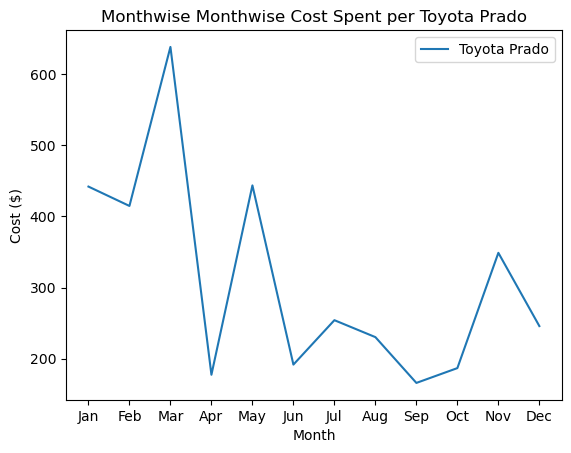

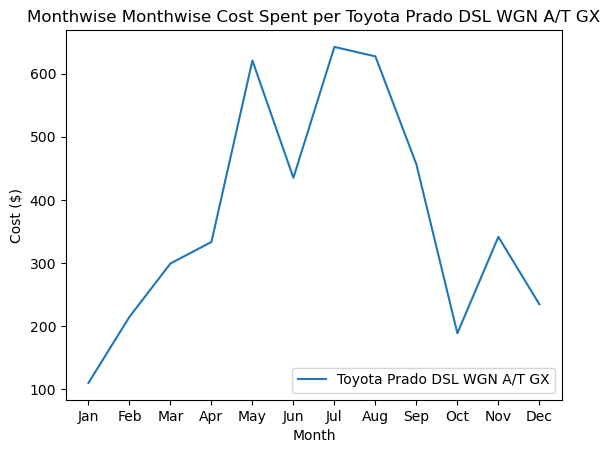

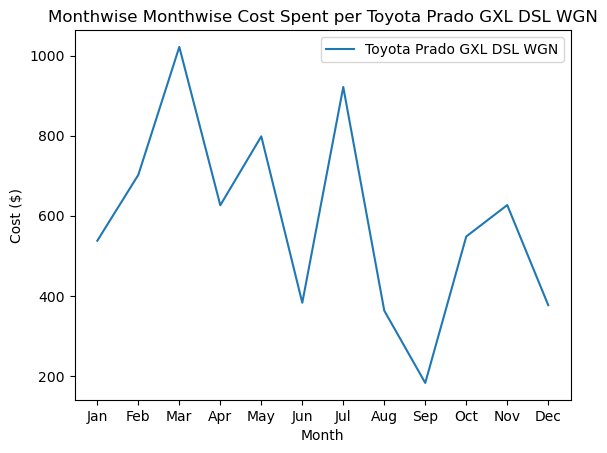

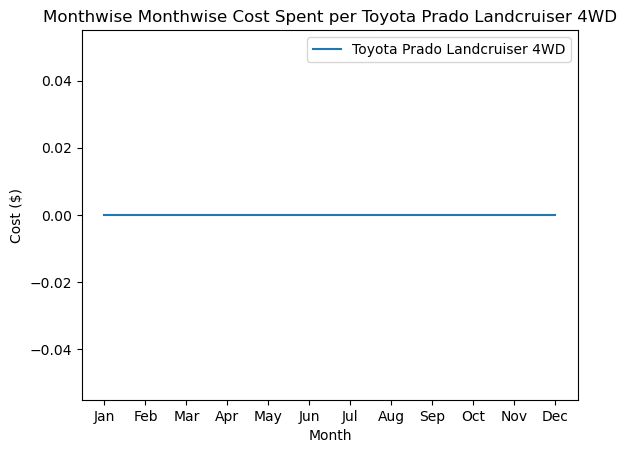

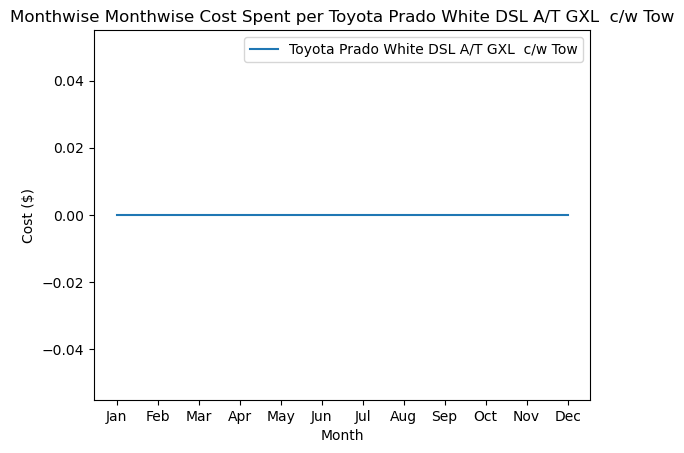

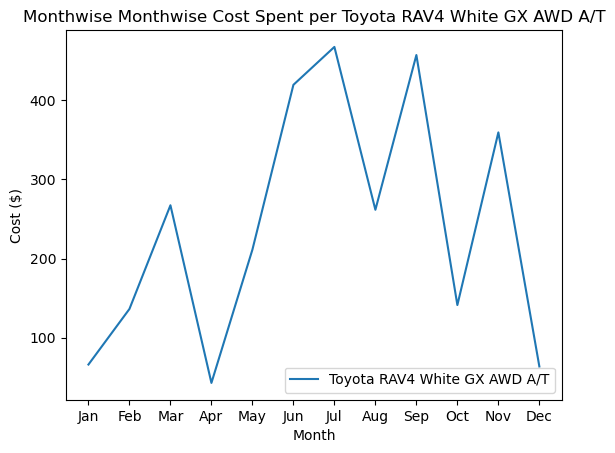

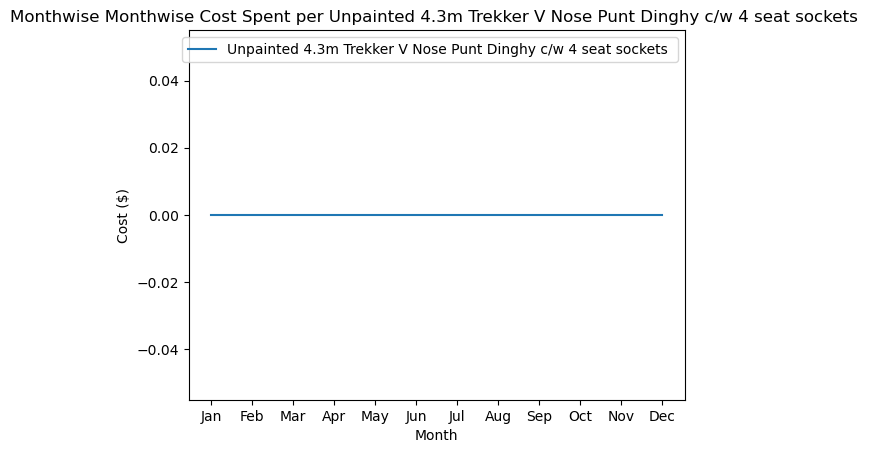

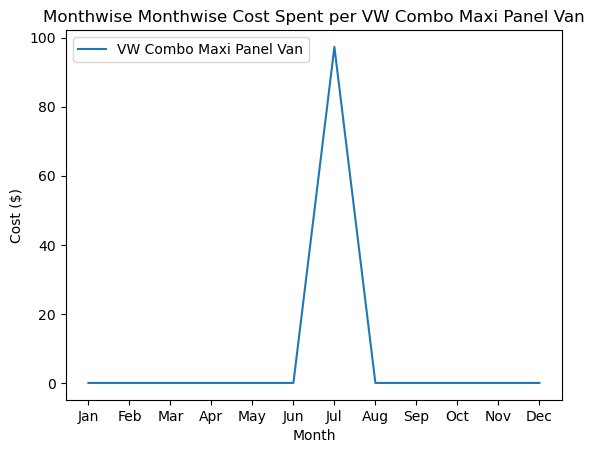

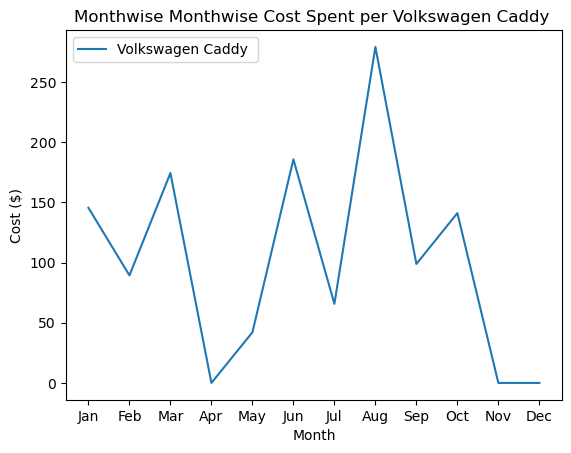

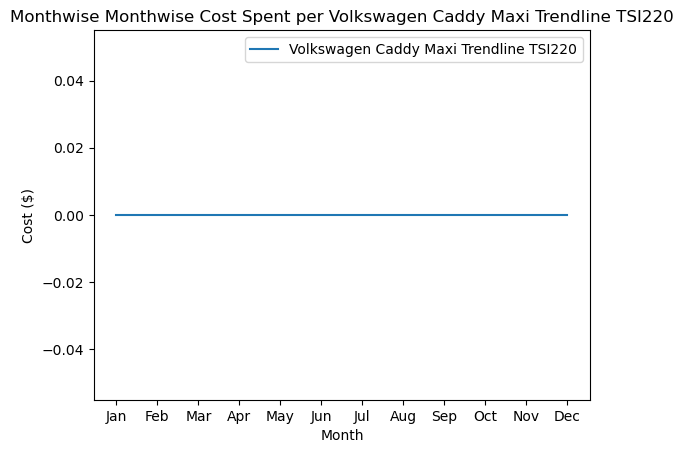

In [20]:
# Group by Vehicle Description and get monthwise cost spent for each
grouped2 = df_cleaned.groupby('Vehicle Description')[[f'{month}-2022_$' for month in months]]

# Plot monthwise litre consumption for each Vehicle Description separately
plt.figure(figsize=(12, 6))
for vehicle_desc, data in grouped2:
    plt.plot(months, data.values[0], label=vehicle_desc)
    plt.xlabel('Month')
    plt.ylabel('Cost ($)')
    plt.title('Monthwise Monthwise Cost Spent per ' + vehicle_desc)
    plt.legend()
    plt.show()

C:\Users\anand\AppData\Local\Temp\ipykernel_6984\1486090672.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')


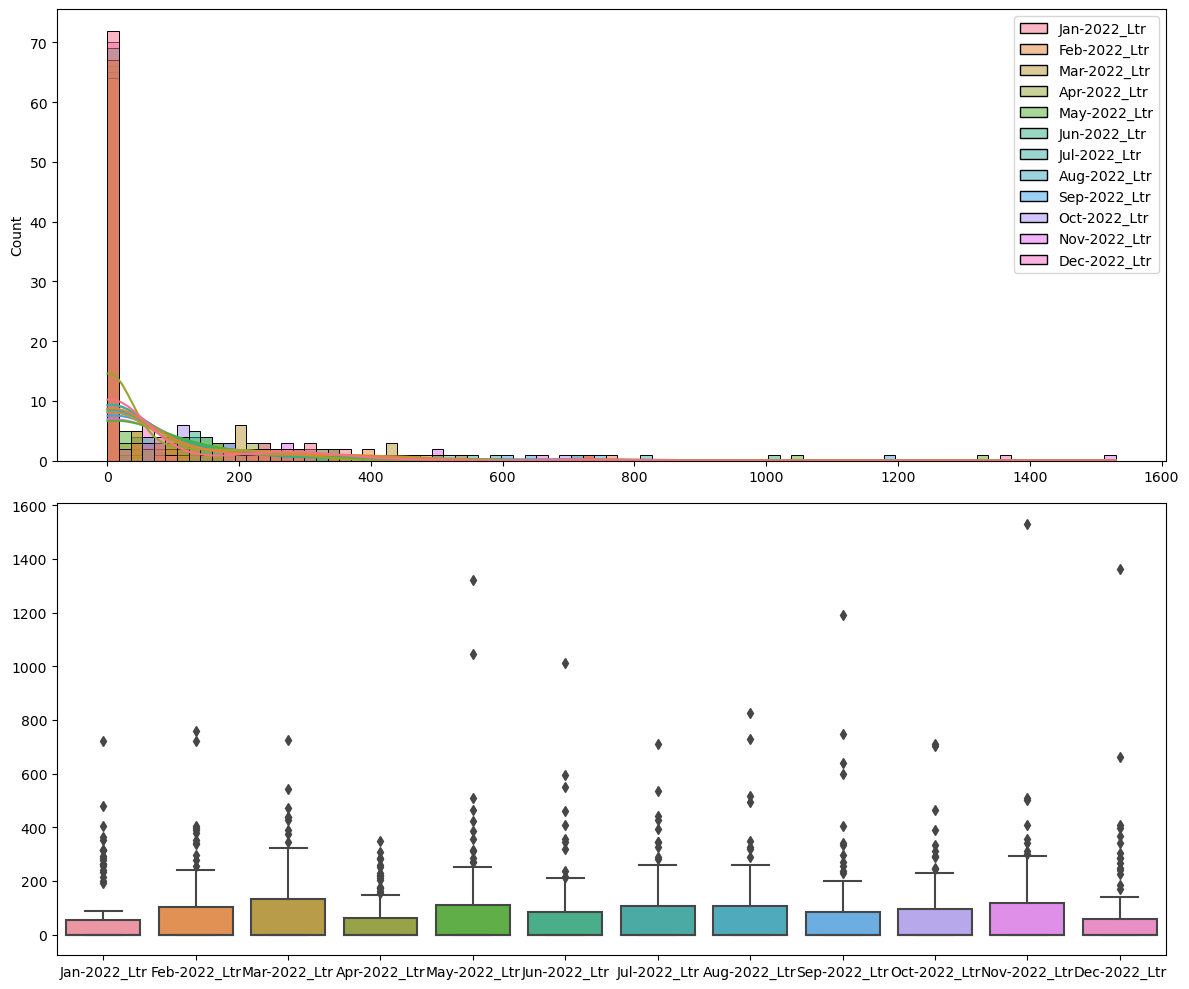

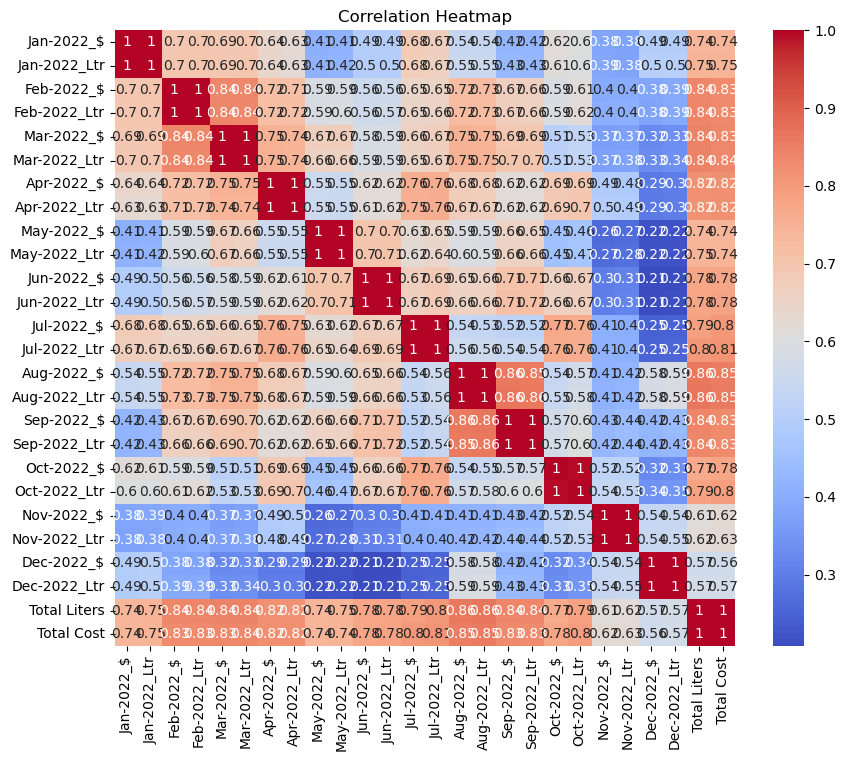

C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anand\anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Descriptive Statistics:         Jan-2022_$  Jan-2022_Ltr   Feb-2022_$  Feb-2022_Ltr   Mar-2022_$  \
count   101.000000    101.000000   101.000000    101.000000   101.000000   
mean    110.381287     65.618317   134.372475     75.518020   184.040099   
std     223.084298    132.756628   259.902012    146.395124   312.681825   
min       0.000000      0.000000     0.000000      0.000000     0.000000   
25%       0.000000      0.000000     0.000000      0.000000     0.000000   
50%       0.000000      0.000000     0.000000      0.000000     0.000000   
75%      90.540000     55.310000   186.500000    101.340000   299.030000   
max    1247.850000    722.340000  1374.130000    759.200000  1479.030000   

       Mar-2022_Ltr  Apr-2022_$  Apr-2022_Ltr   May-2022_$  May-2022_Ltr  \
count    101.000000  101.000000    101.000000   101.000000    101.000000   
mean      88.914059   95.869109     49.010099   178.518614     88.505842   
std      150.623715  172.822913     87.219650   398.447006    1

In [115]:
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None)
# Remove rows with any missing values
df_cleaned = df.dropna()

# Descriptive Statistics
descriptive_stats = df_cleaned.describe()

# Time Series Analysis
monthly_trends = df_cleaned.set_index('Vehicle Description').T

# Distribution Analysis
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.histplot(df_cleaned.filter(like='_Ltr'), kde=True, ax=ax[0])
sns.boxplot(data=df_cleaned.filter(like='_Ltr'), ax=ax[1])
plt.tight_layout()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# PCA Analysis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned.filter(like='_Ltr'))
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)


# Outputting results
print('Descriptive Statistics:\
', descriptive_stats)
print('\
PCA Results:\
', pca_results)
print('\
K-Means Clustering Labels:\
', kmeans.labels_)

The correlation values range from moderate to high, indicating a significant relationship between the costs and liters consumed across different months.
For instance, the correlation between January 2022 costs and liters is approximately 0.72, suggesting a strong positive relationship. This correlation analysis helps in understanding how closely the costs are related to the fuel consumption across different months.

Descriptive Statistics: Provided a statistical summary of the data.

Time Series Analysis: Analyzed monthly trends.

Distribution Analysis: Visualized the distribution of liters consumed per month.

Correlation Heatmap: Generated a heatmap to visualize correlations between variables.

PCA Analysis: Performed Principal Component Analysis to reduce dimensionality.